## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [425]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [426]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [427]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [428]:
# Read data and create a data frame
loan_modelling = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/PersonalLoanCampaign/Loan_Modelling.csv')

In [429]:
# Copying data to another variable to avoid any changes to original data
data = loan_modelling.copy()

## Data Overview

### View the first and last 5 rows of the dataset.

In [430]:
# Display first 5 rows from the dataset
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [431]:
# Display last 5 rows from the dataset
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [432]:
# Get shape of the dataset
(rows, cols) = data.shape

# Print number of rows and columns
print(f'The dataset contains {rows} rows and {cols} columns.')

The dataset contains 5000 rows and 14 columns.


### Check the data types of the columns for the dataset.

In [433]:
# Display summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are total 14 columns in the dataset. 13 of them contains int values and only 1 colum contains floating values.
* None of the column has null values.

### Statistical summary of the data

In [434]:
# Discriptive statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Based on the descriptive statisctis generated by descibe() method, it is clear  that

* Dataset is clean with 5000 complete rows.  
* Customers range from 23 to 67 years old. Half of customers are 45 or younger and 75% of customers are 55 or younger.
* Experience range from -3 to 43 years. Minimum value in the experience column is negative. Professional experience cannot be negative, therefore, I will assume this is incorrect data and will be replaced with absolute values.
* Annual income reanges from 8K to 224K with an average of 73.7K. Half of customers earn 64K or less, and top 25% earns above 98K. The highest incomes go up to 224K.
* The average family size is 2 to 3 members, and half of the customers have 2 or fewer family members.
* Customers spend an average of 1.94K per month on credit cards. There are some customers spending up to 10K per month.
* The median education level is 2 that means most customers completed undergraduate-level education.
* Mortgage ranges from 0 to 635K but the median is 0 that means more than half of customers have no mortgage.  
* 9.6% responded to personal loan campaign as mentioned in problem context.
* Most customer have no securities (mean=0.10) and CD accounts (mean=0.06)
* Online banking usage is high (mean=0.59)





### Checking for missing values

In [435]:
# Check for null
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* There are no null values in the dataset.



### Check for duplicate records

In [436]:
# Check for duplicate
data.duplicated().sum()

np.int64(0)

* There are no duplicate records in the dataset.



### Check for unexpected values and correction

In [437]:
# Check unique values from Education column
education_unique_values = data['Education'].unique()
print(f'Education values = {education_unique_values}')

Education values = [1 2 3]


* All the values in the `Education` column are expected.

In [438]:
# Check unique values from Family column
family_unique_values = data['Family'].unique()
print(f'Family values = {family_unique_values}')

Family values = [4 3 1 2]


* All the values in the `Family` column are expected.

In [439]:
# Check unique values from Experience column
experience_unique_values = data['Experience'].unique()
print(f'Experience values = {experience_unique_values}')

Experience values = [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


* The `Experience` column contains a few negative values. Assuming negative experience values are present due to data entry issues.

In [440]:
# Convert negative values to positive in experience column
data['Experience'] = abs(data['Experience'])

* Negative experience values are converted to positive using the absolute value transformation.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution? - Answered below where I plot histogram and box plot for `Mortgage`.

2. How many customers have credit cards? - Answered below where I plot labeled barplot for `CreditCard`.

3. What are the attributes that have a strong correlation with the target attribute (personal loan)? - Answered below where I plot heatmap of all the numerical variables with 'Personal_Loan'.

4. How does a customer's interest in purchasing a loan vary with their age? - Answered below where I plot distribution plot of `Age` with respect to 'Personal_Loan'.

5. How does a customer's interest in purchasing a loan vary with their education? - Answered below where I plot stacked barplot between the `Education` and `Personal_Loan`.

### Univariate analysis

In [441]:
# Function to create histogram and boxplot of a given feature
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, title=None):
    """
    Draws a combined boxplot and histogram for a single numeric feature.

    Parameters
    ----------
    data : pandas.DataFrame
        The dataframe containing the feature.
    feature : str
        Column name of the numeric feature to visualize and summarize.
    figsize : tuple, optional
        Figure size (width, height). Default is (12, 7).
    kde : bool, optional
        Whether to overlay a kernel density estimate on the histogram. Default is False.
    bins : int or sequence, optional
        Number of bins or bin edges for the histogram. If None, seaborn/matplotlib decides.
    title : str, optional
        Title for the overall figure. If None, a default based on the feature name is used.

    Notes
    -----
    This plot is meant to be reviewer-friendly:
      - Boxplot on top shows spread, outliers, and mean (star).
      - Histogram below shows distribution shape.
      - Vertical lines mark mean and median (with legend).
      - Summary statistics (n, mean, median, std, skew) are annotated
        directly on the histogram for quick reference.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Precompute basic summary statistics for annotation
    series = data[feature].dropna()  # drop NA just in case
    mean_val = series.mean()
    median_val = series.median()
    std_val = series.std()
    skew_val = series.skew()
    n = series.shape[0]

    # Create the two vertically stacked subplots (boxplot + histogram)
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # ----- Boxplot (top) -----
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box,
        showmeans=True,         # show mean as a marker
        meanprops={
            "marker": "o",
            "markerfacecolor": "white",
            "markeredgecolor": "black",
            "markersize": 6,
        },
        color="violet",
    )
    ax_box.set_xlabel("")      # Remove x-label on the boxplot (will be on histogram)
    ax_box.set_ylabel("")      # Keep it clean; y-label isn't very meaningful here
    ax_box.set_title("")       # Overall title will go on the figure instead

    # Optional: make the boxplot a bit more compact vertically
    ax_box.grid(axis="x", alpha=0.3)

    # ----- Histogram (bottom) -----
    # NOTE: using `color=` instead of `palette=` is more appropriate for a single numeric feature.
    if bins:
        sns.histplot(
            data=data,
            x=feature,
            kde=kde,
            ax=ax_hist,
            bins=bins,
            color="steelblue",
        )
    else:
        sns.histplot(
            data=data,
            x=feature,
            kde=kde,
            ax=ax_hist,
            color="steelblue",
        )

    # Add vertical lines for mean and median with labels for the legend
    ax_hist.axvline(
        mean_val,
        color="green",
        linestyle="--",
        linewidth=2,
        label=f"Mean = {mean_val:.2f}",
    )
    ax_hist.axvline(
        median_val,
        color="black",
        linestyle="-",
        linewidth=2,
        label=f"Median = {median_val:.2f}",
    )

    # Axis labels and title for the bottom plot
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel("Frequency")

    # More informative, reviewer-friendly figure title
    if title is None:
        title = f"Distribution of '{feature}'"
    fig.suptitle(title, fontsize=14, fontweight="bold")

    # Add basic statistics as text inside the histogram area
    # This puts a small stats box in the top-right of the histogram.
    x_min, x_max = ax_hist.get_xlim()
    y_min, y_max = ax_hist.get_ylim()
    text_x = x_min + 0.90 * (x_max - x_min)
    text_y = y_min + 0.95 * (y_max - y_min)

    stats_text = (
        f"n     = {n}\n"
        f"mean  = {mean_val:.2f}\n"
        f"median= {median_val:.2f}\n"
        f"std   = {std_val:.2f}\n"
        f"skew  = {skew_val:.2f}"
    )

    ax_hist.text(
        text_x,
        text_y,
        stats_text,
        ha="left",
        va="top",
        fontsize=10,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),
    )

    # Show legend for mean/median lines
    ax_hist.legend(loc="upper left")

    # Add a light grid for readability
    ax_hist.grid(axis="y", alpha=0.3)

    # Tight layout so labels and title don't overlap
    plt.tight_layout()
    # Adjust top to make room for the suptitle
    plt.subplots_adjust(top=0.90)

    return fig, (ax_box, ax_hist)


In [442]:
# Function to create labeled barplots of a given feature
def labeled_barplot(
    data,
    feature,
    perc=False,
    n=None,
    sort="freq",          # "freq" (default) or "alpha"
    title=None,
    rotation=0,
    show_stats=True,
):
    """
    Create a labeled barplot for a categorical feature.

    Parameters
    ----------
    data : pandas.DataFrame
        The dataframe containing the feature.
    feature : str
        Column name of the categorical feature to visualize.
    perc : bool, optional
        If True, annotate bars with percentages.
        If False, annotate bars with counts. Default is False.
    n : int, optional
        Show only the top-n most frequent categories.
        If None, show all categories.
    sort : {"freq", "alpha"}, optional
        Sort order of categories:
            - "freq": descending by count (most frequent first)
            - "alpha": alphabetical by category label
        Default is "freq".
    title : str, optional
        Figure title. If None, a default based on the feature name is used.
    rotation : int or float, optional
        Rotation of x-axis tick labels. Default is 0.
    show_stats : bool, optional
        Whether to show a small stats box (n, missing, unique) on the plot.

    Notes
    -----
    This plot is intended to be reviewer-friendly:
      - Bars are ordered and labeled.
      - Each bar is annotated with count or percentage.
      - A small stats box summarizes sample size and number of levels.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Work on a Series for convenience
    s = data[feature]

    # Value counts (include NaN as a separate category if present)
    vc = s.value_counts(dropna=False)

    # If we only want top-n categories
    if n is not None:
        vc = vc.head(n)

    # Decide ordering
    if sort == "alpha":
        order = sorted(vc.index, key=lambda x: str(x))
    else:  # "freq" (default)
        order = vc.index

    total_non_missing = s.notna().sum()
    missing = s.isna().sum()
    n_levels = vc.shape[0]

    # Figure size scales with number of categories for readability
    width = max(6, n_levels + 1)
    plt.figure(figsize=(width, 5))

    ax = sns.countplot(
        data=data,
        x=feature,
        order=order,
        palette="Paired",
    )

    # Rotate x-tick labels if needed
    plt.xticks(rotation=rotation, fontsize=11)

    # Axis labels and title
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    if title is None:
        title = f"Distribution of '{feature}'"
    ax.set_title(title, fontsize=14, fontweight="bold")

    # Annotate each bar with count or percentage
    total_for_perc = len(s)  # use total rows (including missing) for %
    for p in ax.patches:
        count = int(p.get_height())
        if count == 0:
            continue

        if perc:
            pct = 100 * count / total_for_perc
            label = f"{pct:.1f}%"
        else:
            label = f"{count}"

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=11,
            xytext=(0, 5),
            textcoords="offset points",
        )

    # Small stats box in top-right corner
    if show_stats:
        stats_text = (
            f"n (non-missing) = {total_non_missing}\n"
            f"missing         = {missing}\n"
            f"unique levels   = {n_levels}"
        )
        ax.text(
            0.99,
            0.98,
            stats_text,
            transform=ax.transAxes,   # axis-relative coordinates
            ha="right",
            va="top",
            fontsize=10,
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.9),
        )

    # Add a light grid on y-axis for readability
    ax.grid(axis="y", alpha=0.3)

    plt.tight_layout()
    plt.show()


(<Figure size 1200x700 with 2 Axes>,
 (<Axes: >, <Axes: xlabel='Age', ylabel='Frequency'>))

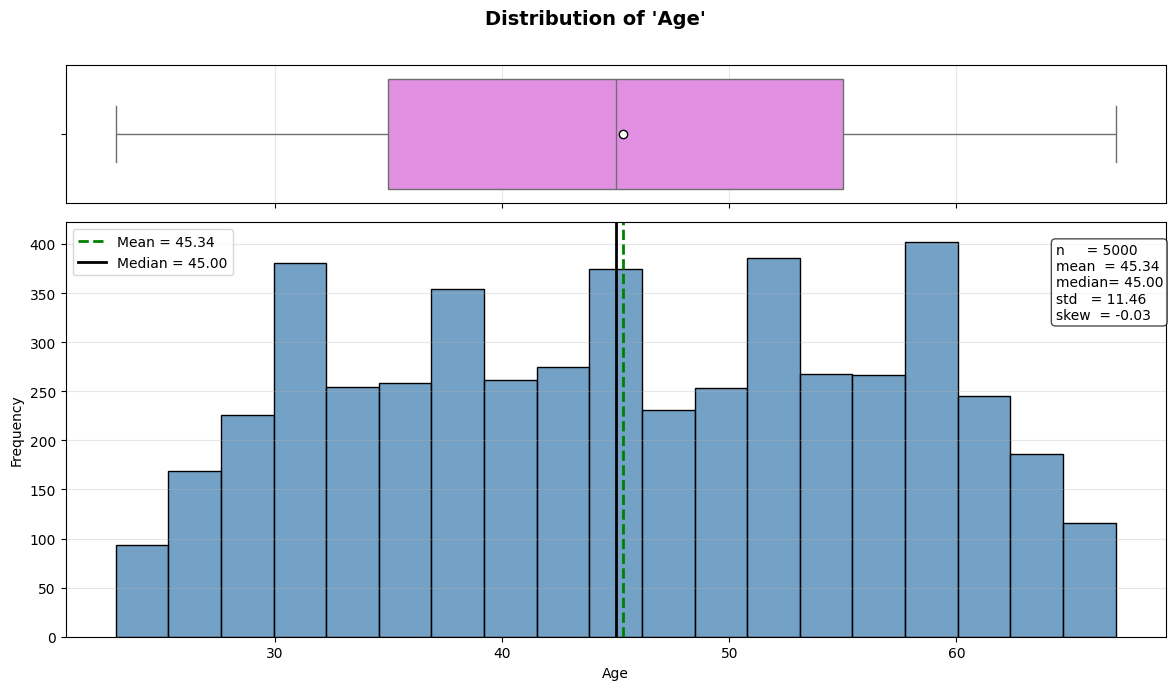

In [443]:
# Age histogra and box plot
histogram_boxplot(data, 'Age')

* Age appears to be uniformly distributed. The median age is around 45 years, and the mean indicated by the dashed line is also close to 45 which shows that the age distribution is well-balanced. There are no outliers present in the boxplot.

(<Figure size 1200x700 with 2 Axes>,
 (<Axes: >, <Axes: xlabel='Experience', ylabel='Frequency'>))

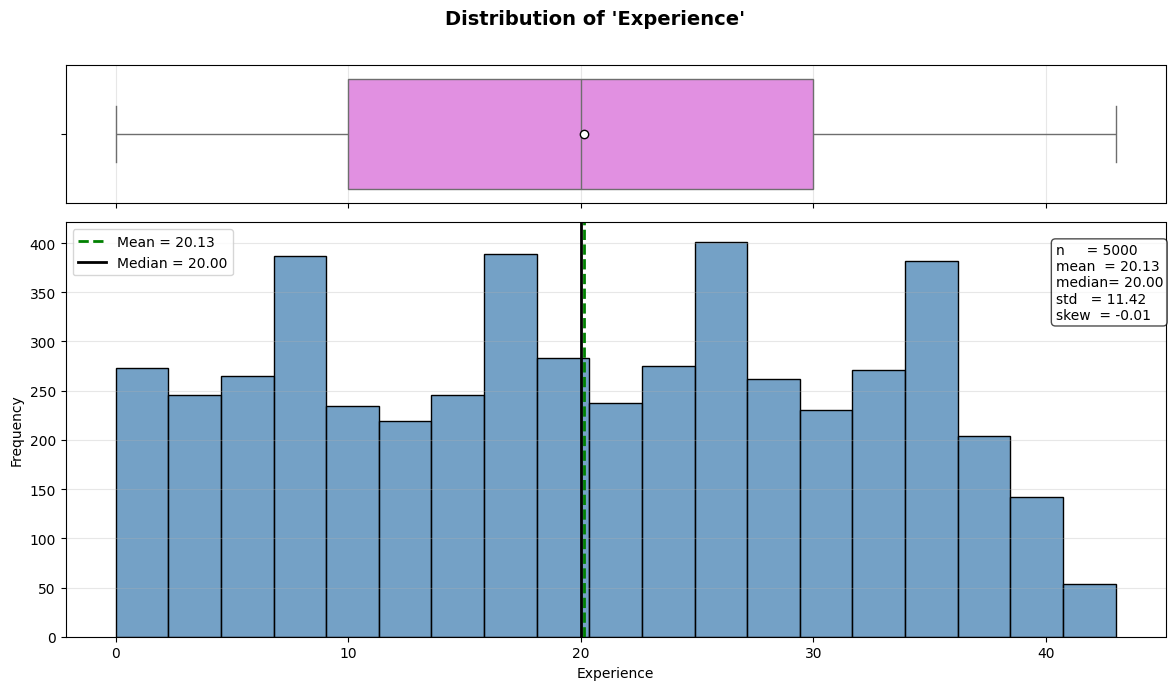

In [444]:
# Experience histogram and box plot
histogram_boxplot(data, 'Experience')

* Experience appears to be uniformly distributed as well. The median exprience is around 20 years, and the mean indicated by the dashed line is also close to 20 which shows that the experience distribution is well-balanced. There are no outliers present in the boxplot.

(<Figure size 1200x700 with 2 Axes>,
 (<Axes: >, <Axes: xlabel='Income', ylabel='Frequency'>))

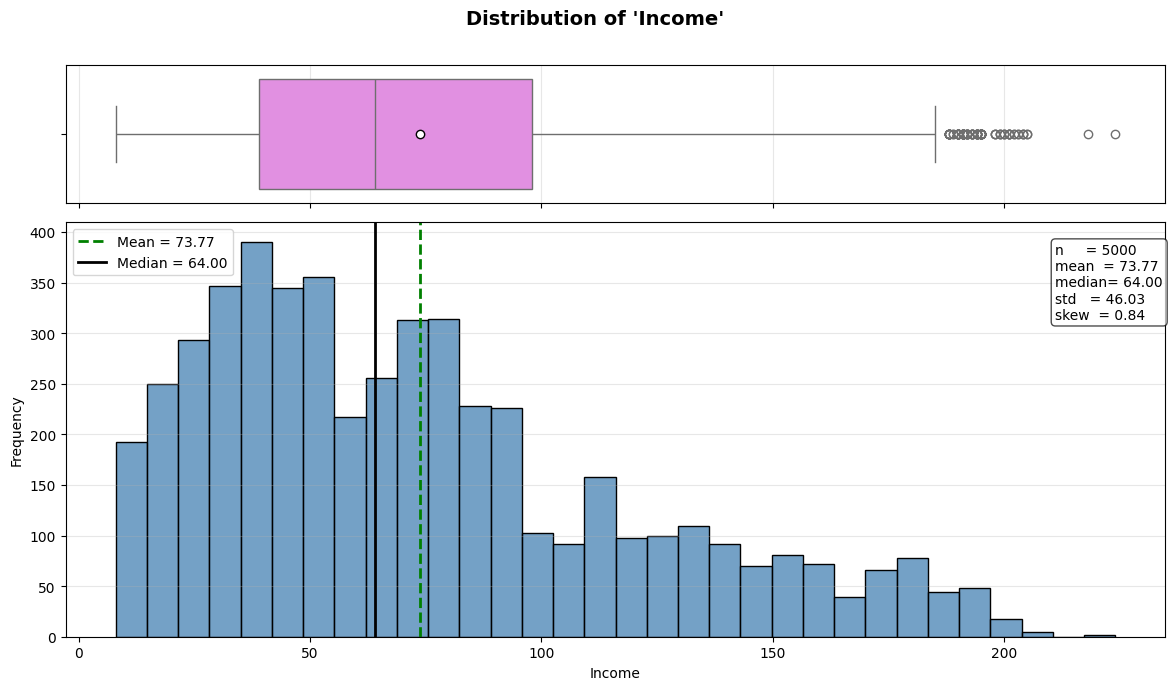

In [445]:
# Income histogram and box plot
histogram_boxplot(data, 'Income')

* Income variable shows a right-skewed distribution, meaning, most of the customers earns between 25K to 100K per year. The median income is around 65K, while the mean is around approximately 75K that is slightly higher due to the presence of higher-income customers. The boxplot shows several high-income outliers, with some customers earning more than 150K and up to a maximum of around 220K.

(<Figure size 1200x700 with 2 Axes>,
 (<Axes: >, <Axes: xlabel='CCAvg', ylabel='Frequency'>))

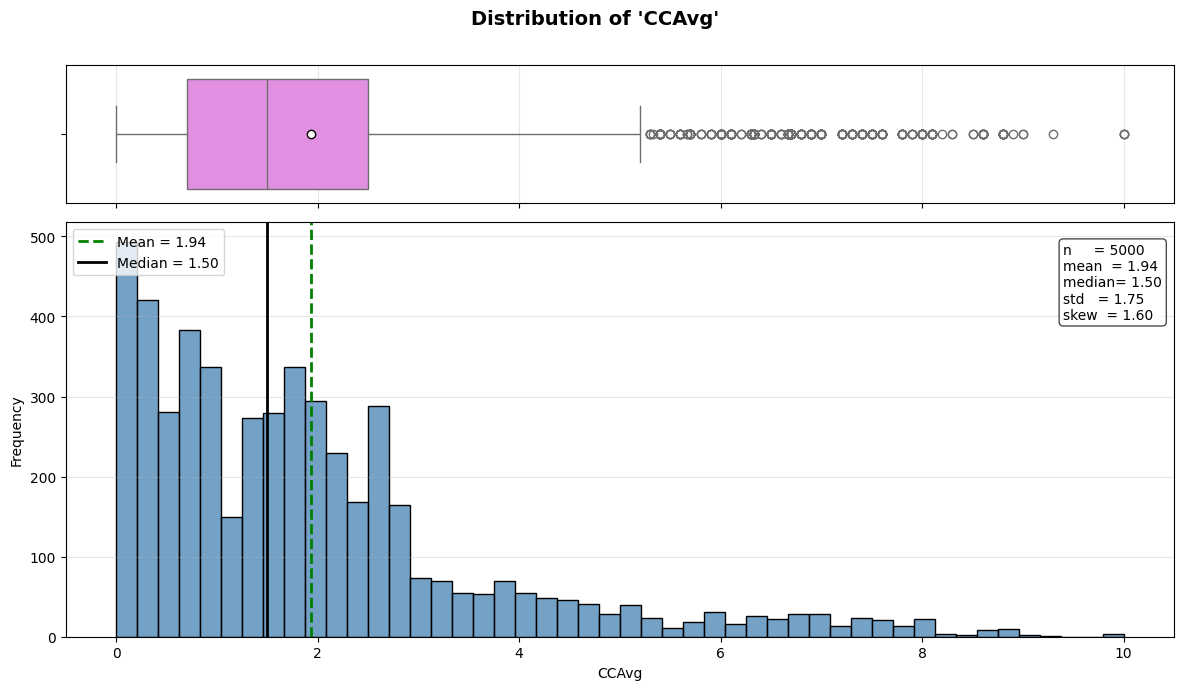

In [446]:
# CCAvg histogram and box plot
histogram_boxplot(data, 'CCAvg')

* The CCAvg variable is strongly right-skewed, with the majority of customers spending less than 3K per month on credit cards. Histogram plot shows that most customers fall between 0 and 2K. The boxplot shows several high-spending outliers, with some customers spending over 5K and up to 10K per month.

(<Figure size 1200x700 with 2 Axes>,
 (<Axes: >, <Axes: xlabel='Mortgage', ylabel='Frequency'>))

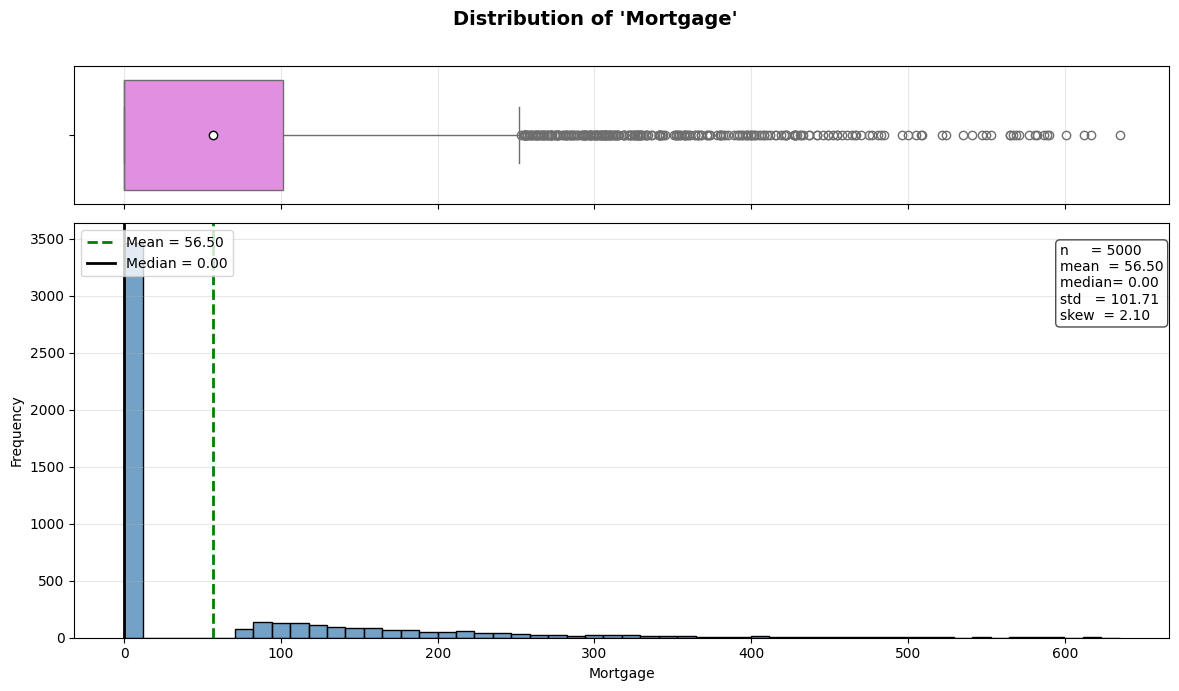

In [447]:
# Mortgage histogram and box plot
histogram_boxplot(data, 'Mortgage')

* Question(1). What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
* Answer(1). Histogram plot indicates the distribution of mortgage attribute is extremly right-skewed. About 3500 customers have 0 mortgage and remaining customer mortgage range from ~50K to 600k. Boxplot indicates many outliers above 250K.



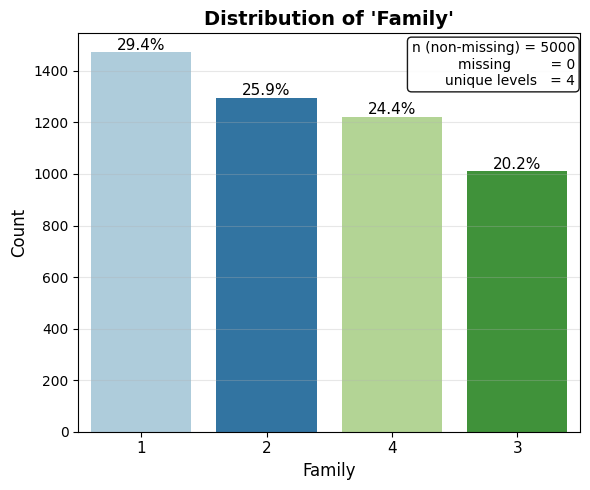

In [448]:
# Family barplot
labeled_barplot(data, "Family", perc=True)

* The Family variable shows a well-balanced distribution across all four family sizes.

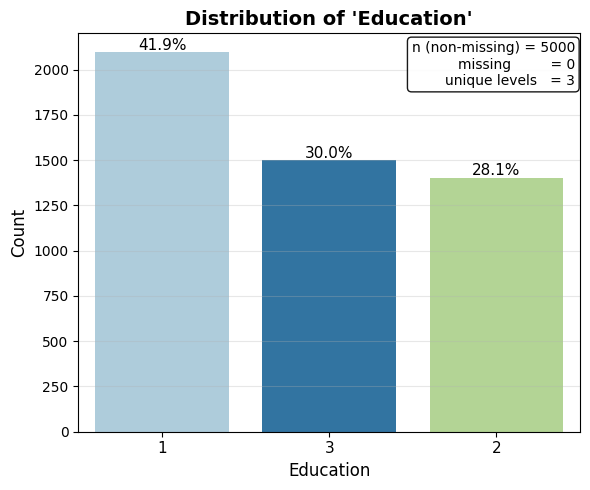

In [449]:
# Education barplot
labeled_barplot(data, "Education", perc=True)

* There are slightly higher number of customers are having education level as undergrade while graduate and professionls are around the same. Basically, Education variable shows three clearly defined customer groups.

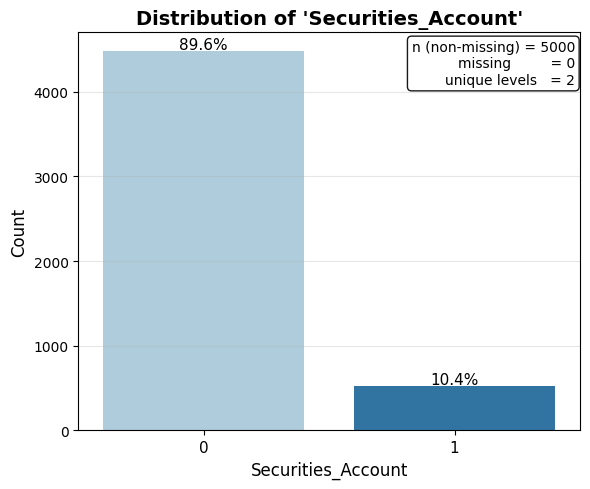

In [450]:
# Securities_Account barplot
labeled_barplot(data, "Securities_Account", perc=True)

* The majority of customers (89.6%) do not have a securities account, while only 10.4% hold one.

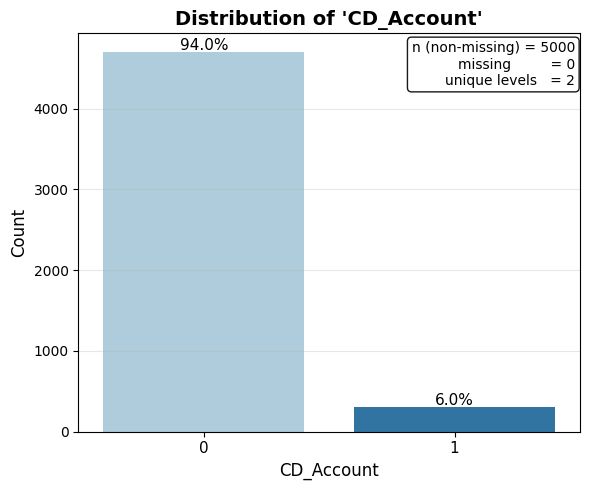

In [451]:
# CD_Account barplot
labeled_barplot(data, "CD_Account", perc=True)

* Similar to Securities_Account, CD_Account shows that only 6% of customers holding a CD account and 94% not holding one.

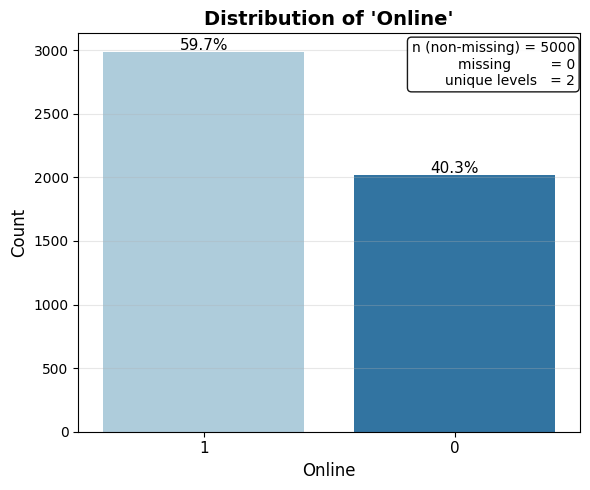

In [452]:
# Online barplot
labeled_barplot(data, "Online", perc=True)

* Most customers (59.7%) use online banking services, while 40.3% do not.

1470 customers (29.4%) have a credit card from another bank, while 3530 customers (70.6%) have no credit card.


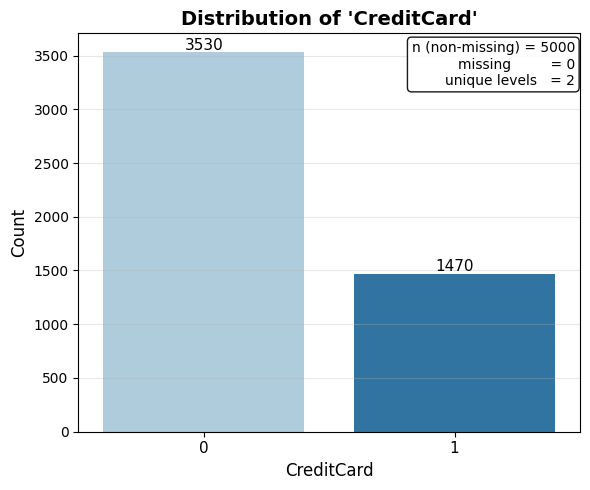

In [453]:
# Total records
total = len(data['CreditCard'])

# Records with credit cards
credit_card = len(data[data['CreditCard']== 1])
credit_card_percentage = ((credit_card)/total)*100

# Records without credit cards
without_credit_card = len(data[data['CreditCard']== 0])
without_credit_card_percentage = (without_credit_card/total)*100

# Print summary
print(f'{credit_card} customers ({credit_card_percentage}%) have a credit card from another bank, while {without_credit_card} customers ({without_credit_card_percentage}%) have no credit card.')

# Creditcard histogram and box plot
labeled_barplot(data, 'CreditCard')

* Question(2). How many customers have credit cards?
* Answer(2). The output of the code snippet given above as well as histogram plot indicates that 1470 customers (29.4%) have a credit card from another bank, while 3530 customers (70.6%) have no credit card.

(<Figure size 1200x700 with 2 Axes>,
 (<Axes: >, <Axes: xlabel='ZIPCode', ylabel='Frequency'>))

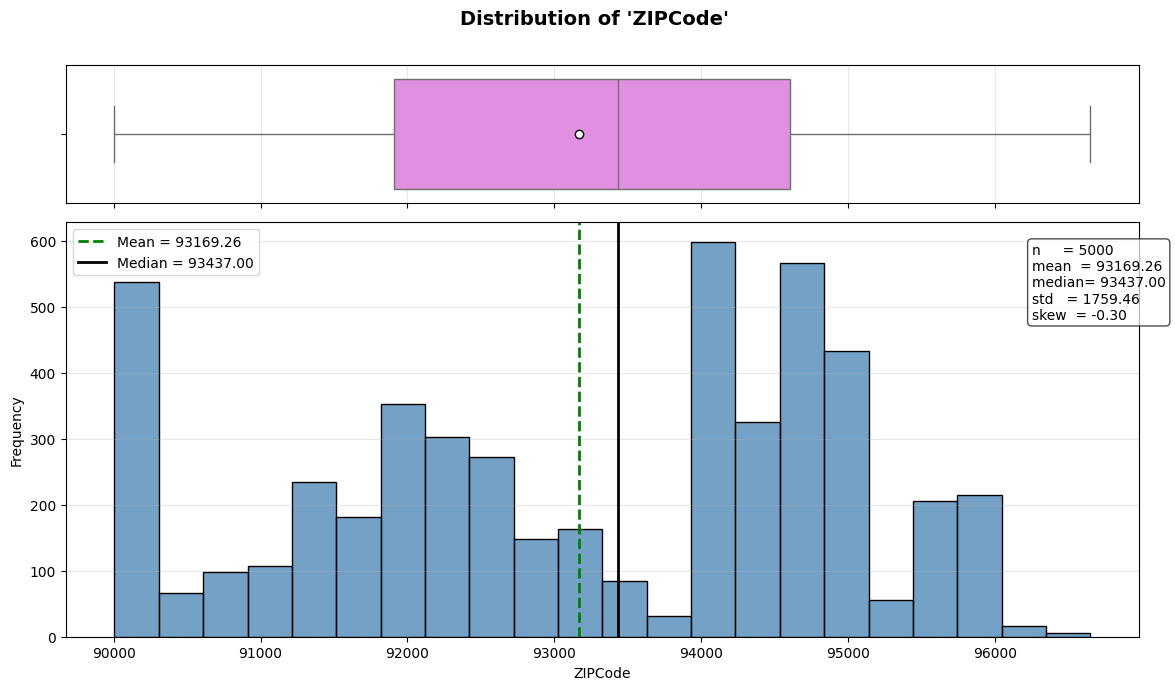

In [454]:
# ZIPCode histogram plot
histogram_boxplot(data, "ZIPCode")

* ZIPCode behaves as a categorical feature rather than a continuous numerical variable. Even though its values are numbers, they represent geographic labels. ZIPCode should be treated as a categorical feature in modeling, not numeric.

### Bivariate analysis

In [455]:
#Function to create a stacked barplot of a given predictor and target variables
def stacked_barplot(data, predictor, target, normalize="index", show_stats=True, title=None):
    """
    Create a stacked barplot for a categorical predictor vs. a target variable.

    Parameters
    ----------
    data : pandas.DataFrame
        The dataframe containing the variables.
    predictor : str
        Column name of the categorical predictor (independent variable).
    target : str
        Column name of the target variable (dependent variable).
    normalize : {"index", None}, optional
        Passed to `pd.crosstab(normalize=...)` for the plotted table:
            - "index": proportions within each predictor level (row %).
            - None: raw counts (stacked counts instead of proportions).
        Default is "index".
    show_stats : bool, optional
        Whether to show a small stats box (sample size, missing, etc.). Default True.
    title : str, optional
        Plot title. If None, a default based on predictor/target names is used.

    Notes
    -----
    This function:
      - Prints the full contingency table (counts).
      - Prints the row-normalized table (if normalize == "index").
      - Plots a stacked bar chart showing how the target distribution varies
        across levels of the predictor.
      - Sorts predictor levels by the proportion of the *last* target category,
        which is usually the positive or more interesting class.
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # --- Contingency tables ---------------------------------------------------
    # Counts table
    ct_counts = pd.crosstab(data[predictor], data[target], margins=True)
    print("Counts (with row/column totals):")
    print(ct_counts)
    print("-" * 120)

    # Normalized table for plotting (usually row percentages)
    ct_plot = pd.crosstab(
        data[predictor],
        data[target],
        normalize=normalize,
    )

    # Sort predictor levels by proportion of the "last" target category
    # (often interpreted as the positive class in binary problems).
    positive_class = ct_plot.columns[-1]
    ct_plot = ct_plot.sort_values(by=positive_class, ascending=False)

    # --- Figure & stacked bar plot -------------------------------------------
    n_levels = ct_plot.shape[0]
    fig_width = max(6, n_levels + 2)  # scale width with number of categories
    fig, ax = plt.subplots(figsize=(fig_width, 5))

    ct_plot.plot(kind="bar", stacked=True, ax=ax, width=0.8, edgecolor="black", colormap="Paired")

    # Axis labels
    ax.set_xlabel(predictor, fontsize=12)
    if normalize == "index":
        ax.set_ylabel(f"Proportion of {target}", fontsize=12)
    else:
        ax.set_ylabel("Count", fontsize=12)

    # Title
    if title is None:
        title = f"{target} distribution across '{predictor}'"
    ax.set_title(title, fontsize=14, fontweight="bold")

    # Legend outside the plot for clarity
    ax.legend(
        title=target,
        loc="upper left",
        bbox_to_anchor=(1.02, 1.0),
        borderaxespad=0.0,
        frameon=False,
    )

    # Grid on y-axis to make comparison easier
    ax.grid(axis="y", alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig, ax

In [456]:
# Function to create distribution plot with respect to target varialbe
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

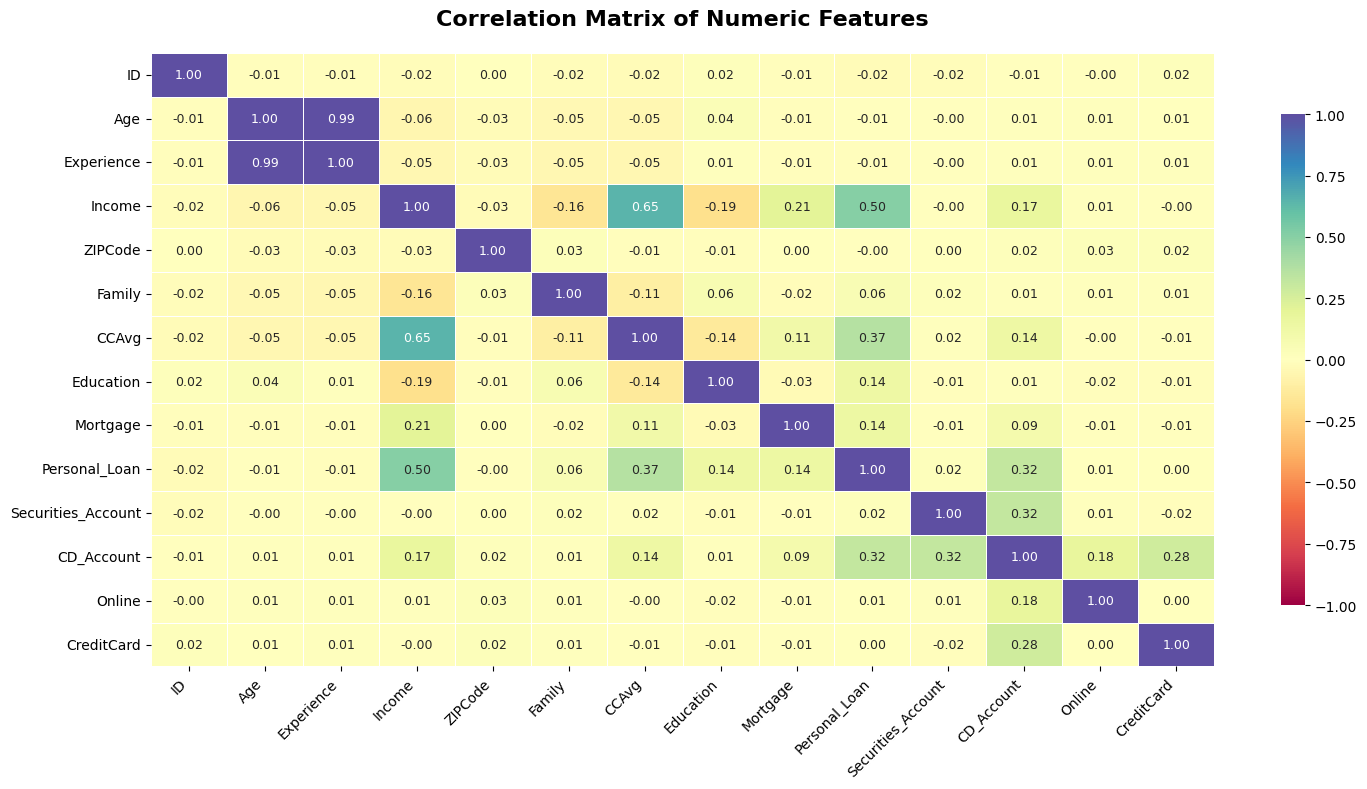

In [457]:
# Plot heatmap
plt.figure(figsize=(15, 8))

corr_matrix = data.corr(numeric_only=True)

# --- Main Heatmap -----------------------------------------------------------
sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation coefficients
    fmt=".2f",           # round to 2 decimals
    cmap="Spectral",     # diverging color map (blue=neg, red=pos)
    vmin=-1, vmax=1,     # enforce symmetric scale for comparability
    linewidths=0.5,      # thin lines between cells for readability
    cbar_kws={"shrink": 0.8},  # shrink color bar for better aesthetics
    annot_kws={"size": 9}      # slightly smaller annotation for large matrices
)

# --- Title -------------------------------------------------------------------
plt.title(
    "Correlation Matrix of Numeric Features",
    fontsize=16,
    fontweight="bold",
    pad=20
)

# --- Improve tick label visibility ------------------------------------------
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


* Question(3). What are the attributes that have a strong correlation with the target attribute (personal loan)?
* Answer(3). Heatmap indicates that `Income` (correlation ~0.50), `CCAvg` (correlation ~0.37), and `CD_Account` (correlation ~0.32) are highlly positively correlated with `Personal_Loan`. Apart from those, `Education` (correlation ~0.14), `Mortgage` (correlation ~0.14), and `Family` (correlation ~0.06) are also positive correlated with `Personal_Loan`. However, the rest of the other features shows weak relationships or no correlation with `Personal_Loan`.

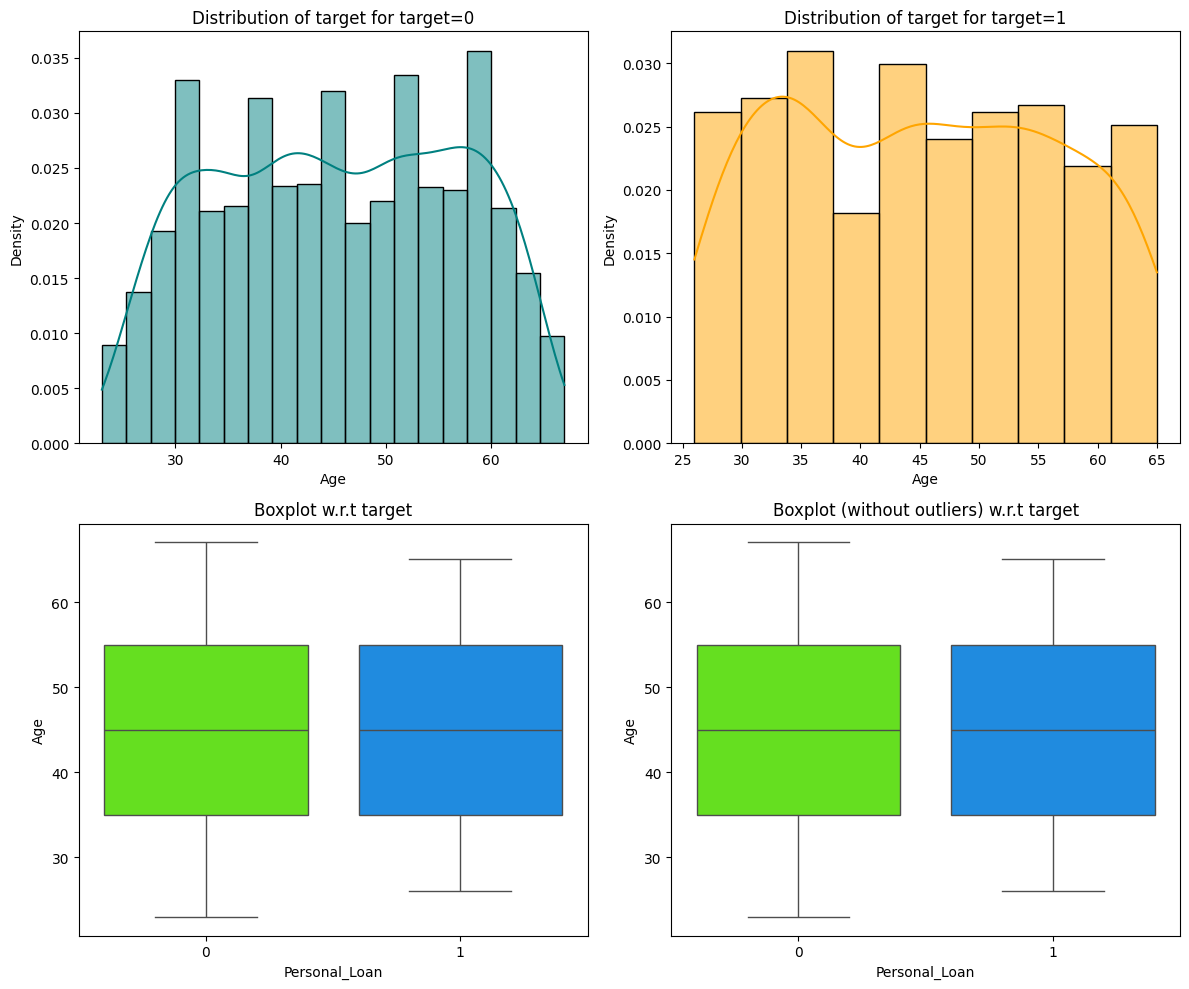

In [458]:
# Age vs. Personal_Loan
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* Question(4). How does a customer's interest in purchasing a loan vary with their age?
* Answer(4). Heatmap indicates (-0.01) that there is no correlation with `Age` and `Personal_Loan`. Boxplot indicates that median age for accepted vs rejected loans are almost identical meaning there is no significant difference in age between customers who accepted the personal loan and those who did not.

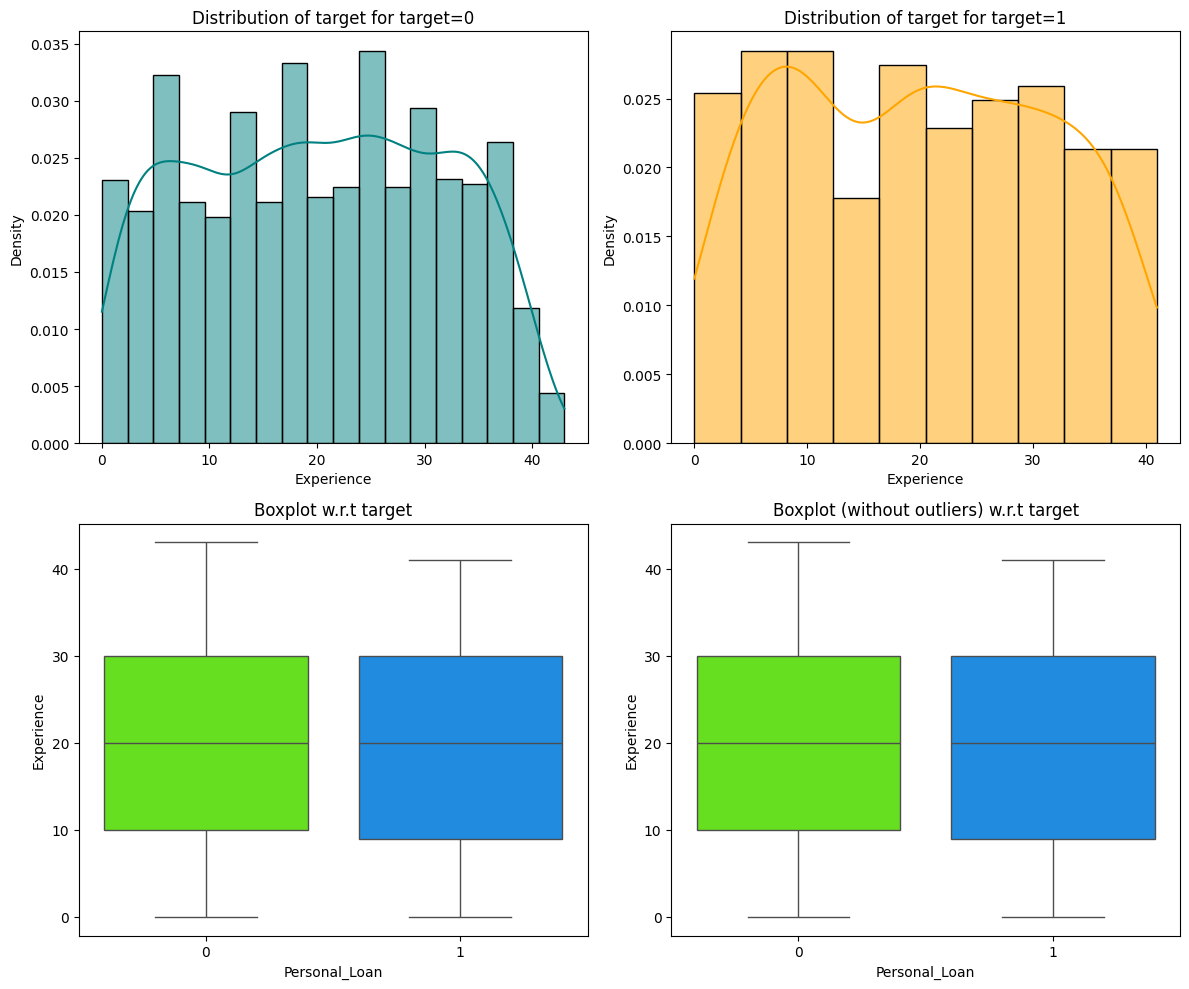

In [459]:
# Experience vs. Personal_Loan
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

* There is no noticeable difference in work experience between customers who accepted the personal loan and those who did not, therefore, Experience is not a useful predictor.

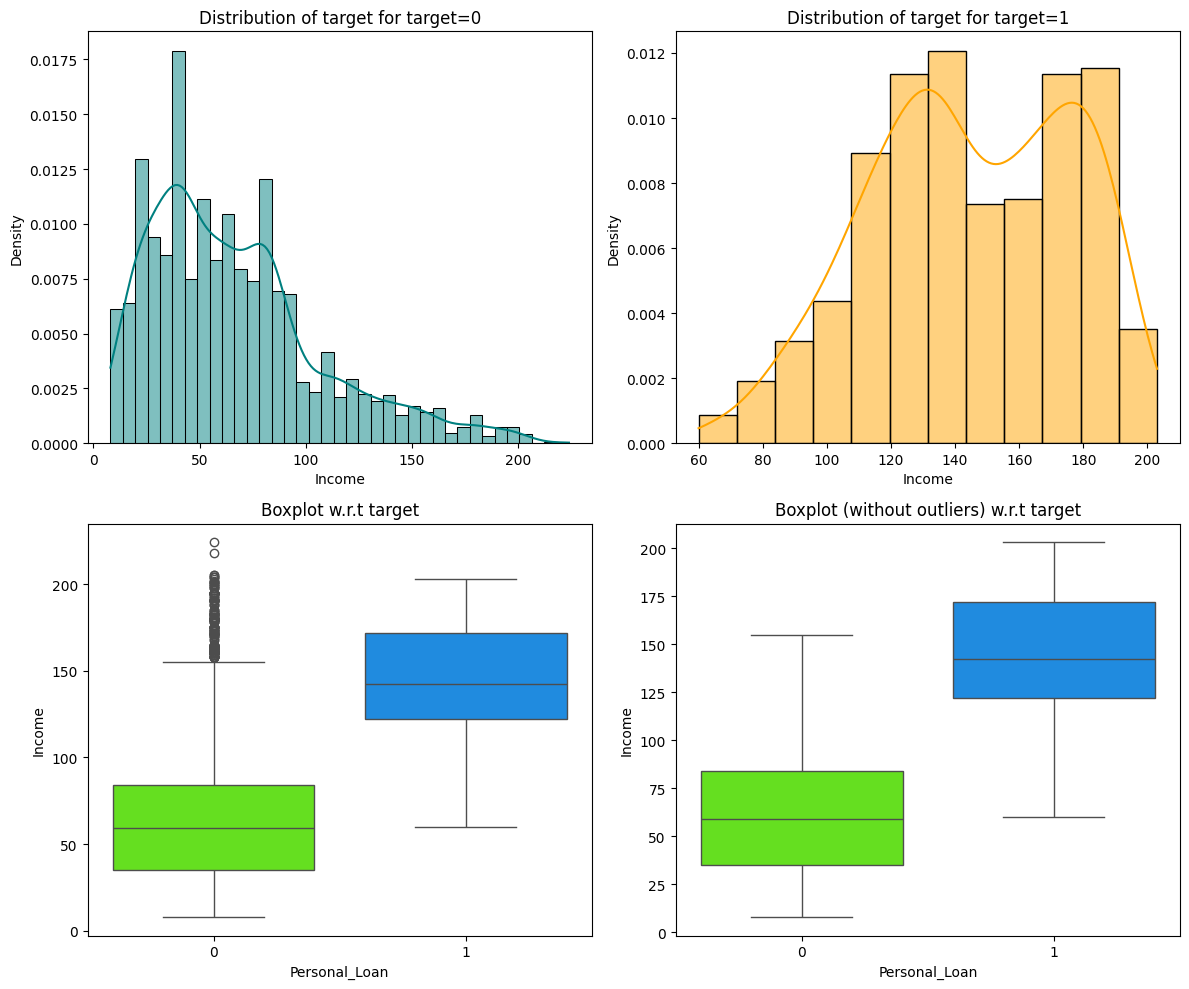

In [460]:
# Income vs. Personal_Loan
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* Customers who accepted the personal loan tend to have significantly higher annual incomes compared to those who did not, therefore, Income is a strong predictor.

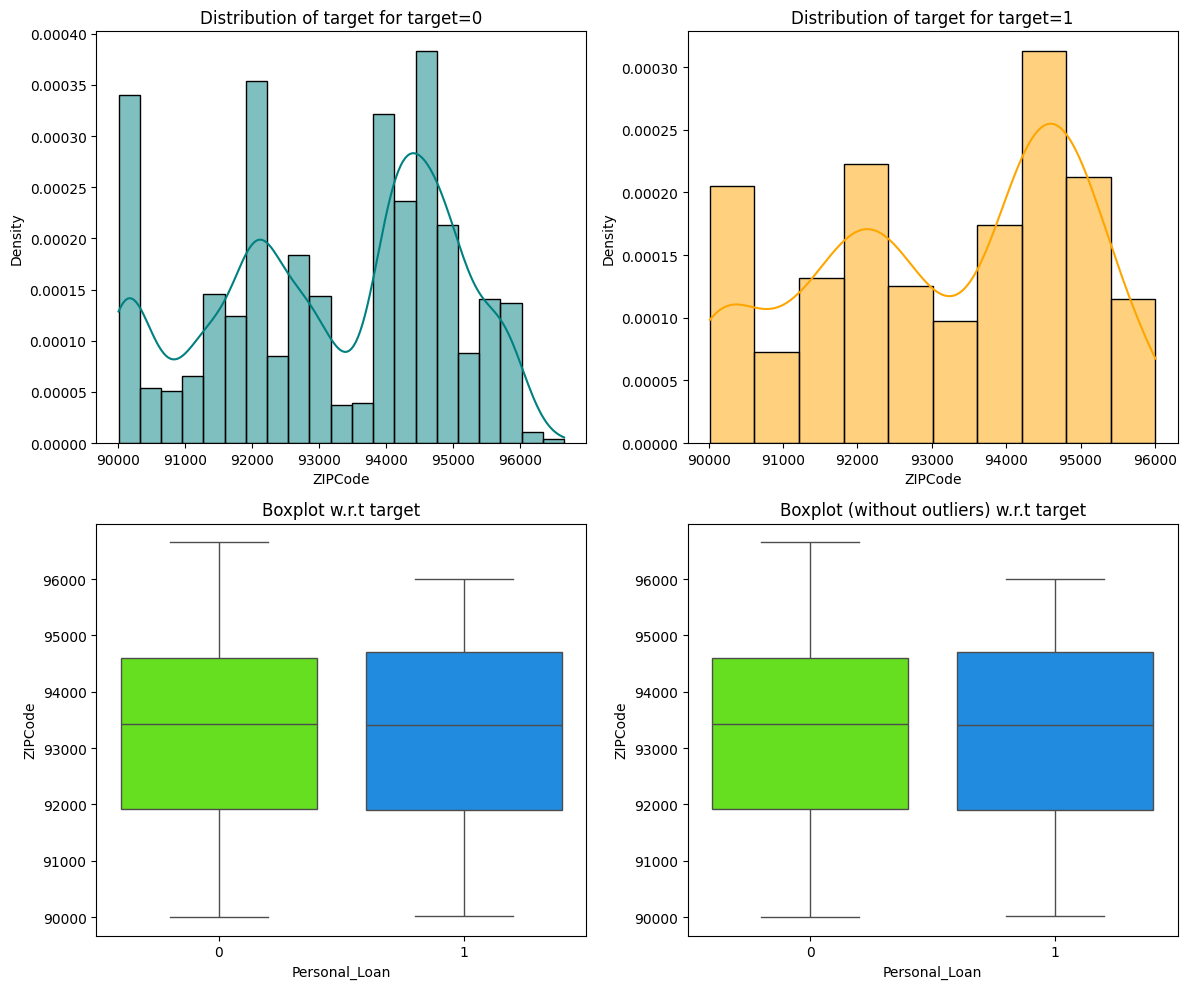

In [461]:
# ZIPCode vs. Personal_Loan
distribution_plot_wrt_target(data, 'ZIPCode', 'Personal_Loan')

* Distribution plot indicates that ZIPCode does not meaningfully affect personal loan acceptance, therefore, ZIPCode is not a useful predictor.

Counts (with row/column totals):
Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


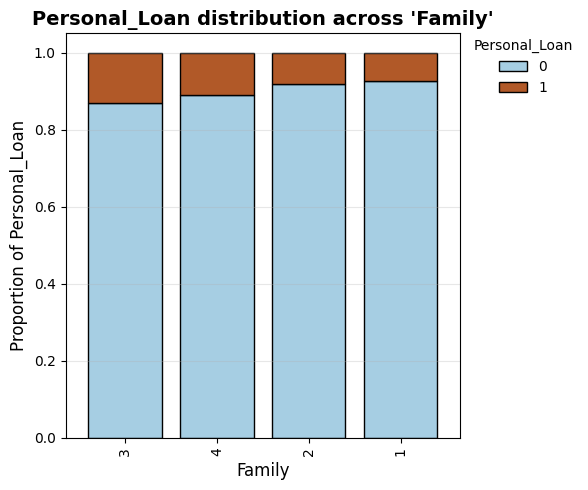

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': "Personal_Loan distribution across 'Family'"}, xlabel='Family', ylabel='Proportion of Personal_Loan'>)

In [462]:
# Family vs. Personal_Loan
stacked_barplot(data, 'Family', 'Personal_Loan')

* stacked barplot indicates that family size has little impact on personal loan acceptance, therefore, Family is not a strong but a meaningful predictor.

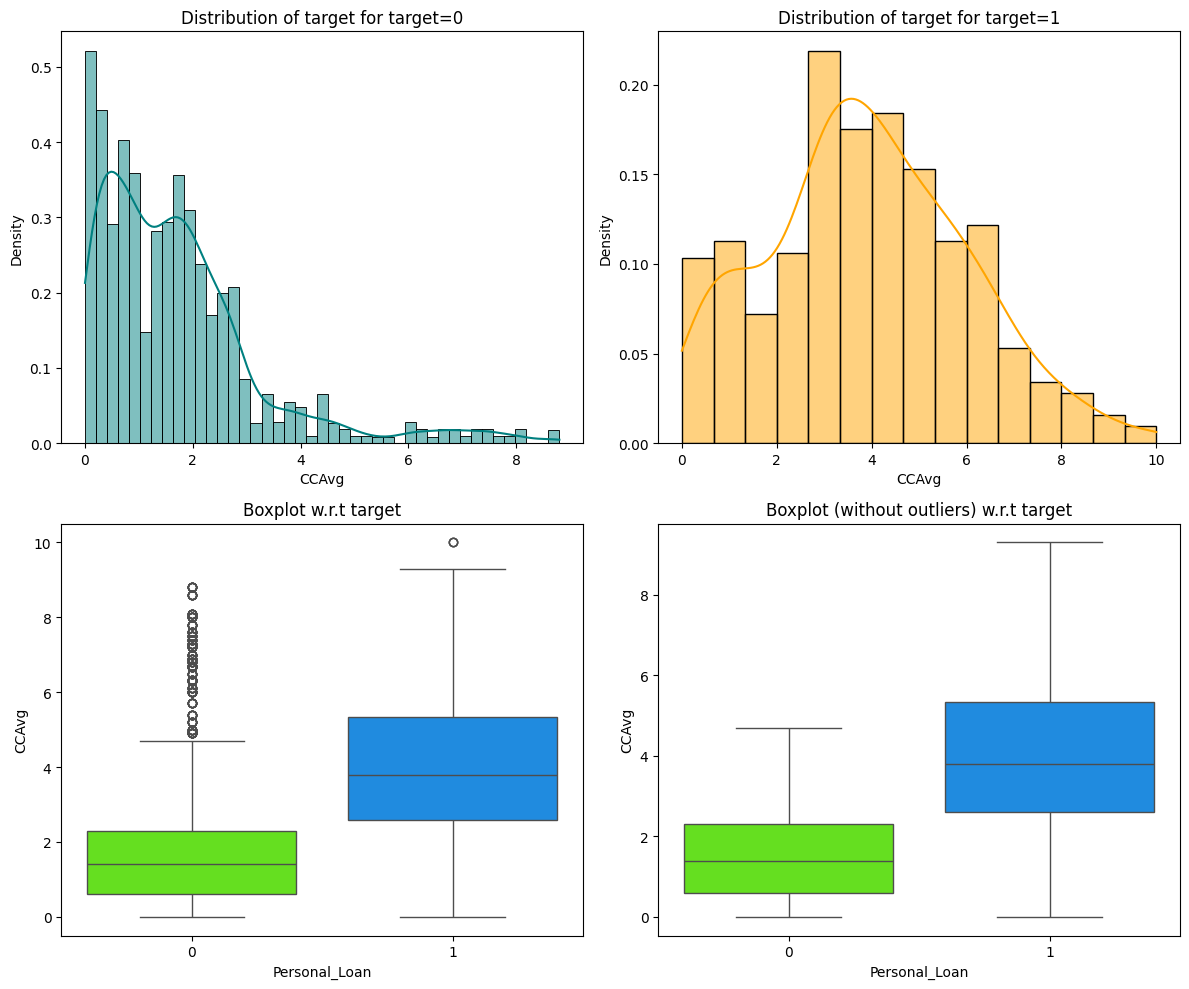

In [463]:
# CCAvg vs. Personal_Loan
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Customers who accepted the personal loan have significantly higher average monthly credit card spending (CCAvg) compared to those who did not, therefore, CCAvg is a strong behavioral indicator and one of the strong predictor.

Counts (with row/column totals):
Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


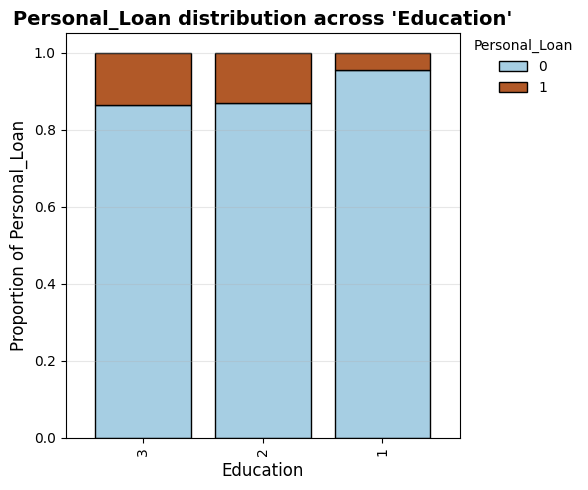

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': "Personal_Loan distribution across 'Education'"}, xlabel='Education', ylabel='Proportion of Personal_Loan'>)

In [464]:
# Education vs. Personal_Loan
stacked_barplot(data, 'Education', 'Personal_Loan')

* Question(5). How does a customer's interest in purchasing a loan vary with their education?
* Answer(5). Barplot indicates that loan acceptance rate increases with education level (Graduate, and Professional)

* Customers with higher education levels are more likely to accept personal loans, therefore education is a meaningful predictor.

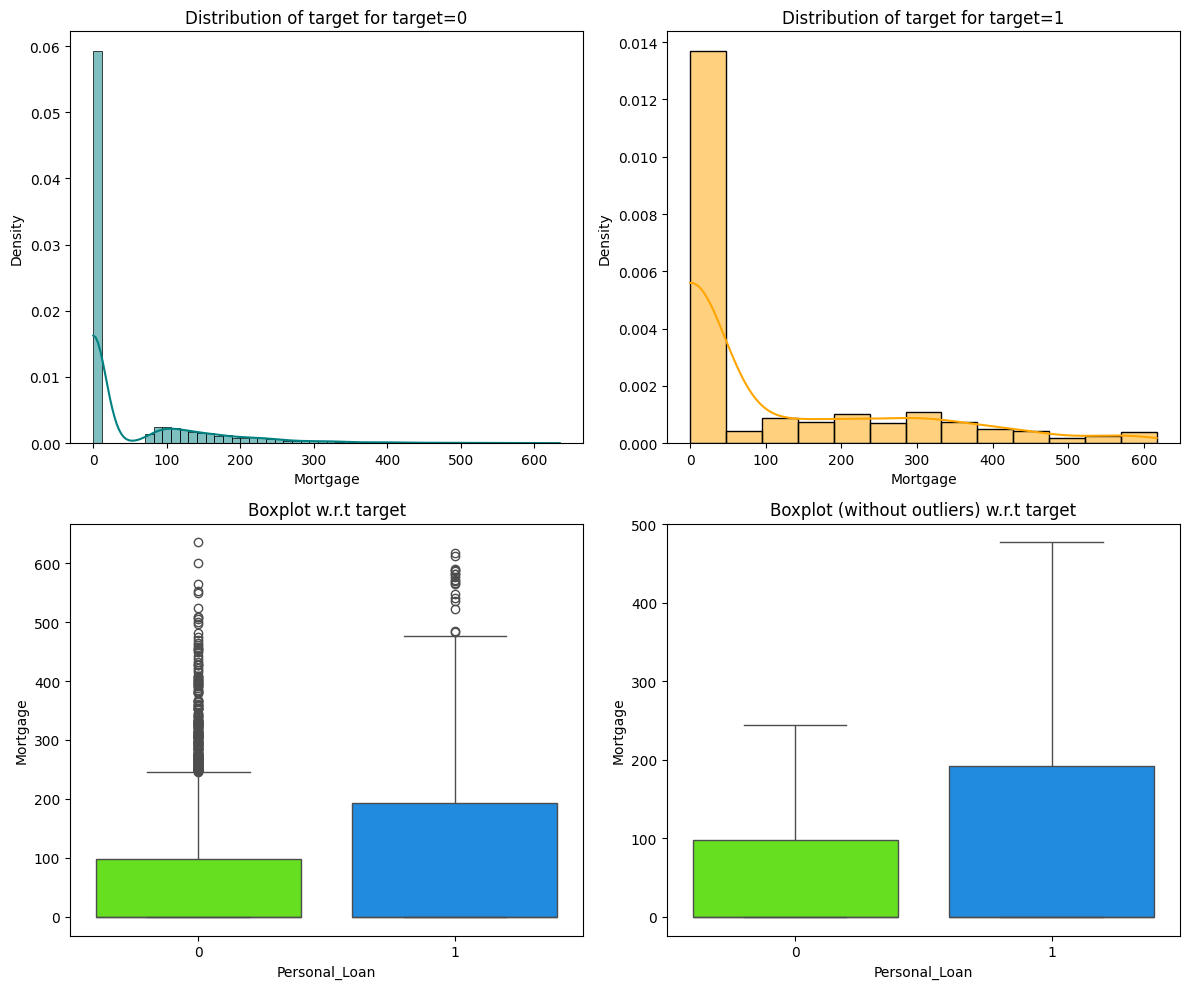

In [465]:
# Mortgage vs. Personal_Loan
distribution_plot_wrt_target(data, 'Mortgage', 'Personal_Loan')

* Customers who accepted the personal loan tend to have slightly higher mortgage values, but the this effect is much smaller compared to other variables, therefore, Mortgage is not a strong predictor.

Counts (with row/column totals):
Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


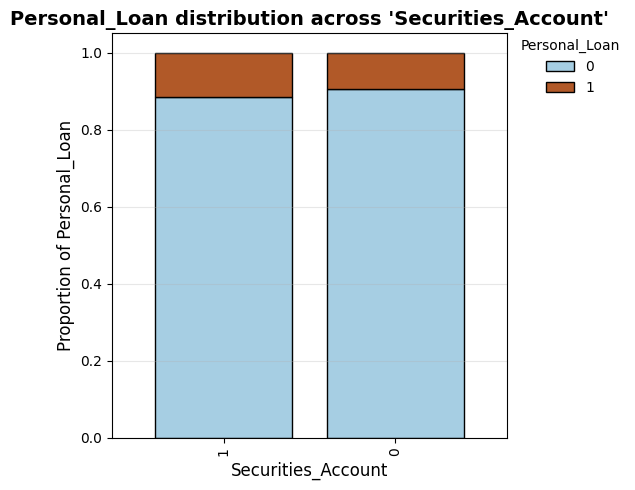

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': "Personal_Loan distribution across 'Securities_Account'"}, xlabel='Securities_Account', ylabel='Proportion of Personal_Loan'>)

In [466]:
# Securities_Account vs. Personal_Loan
stacked_barplot(data, 'Securities_Account', 'Personal_Loan')

* There is no meaningful difference in Securities Account ownership between customers who accepted the personal loan and those who did not, therefore, Securities_Account is is not a useful predictor.

Counts (with row/column totals):
Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


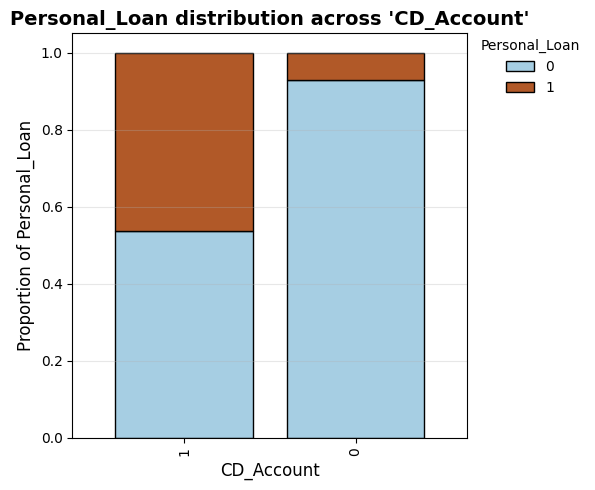

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': "Personal_Loan distribution across 'CD_Account'"}, xlabel='CD_Account', ylabel='Proportion of Personal_Loan'>)

In [467]:
# CD_Account vs. Personal_Loan
stacked_barplot(data, 'CD_Account', 'Personal_Loan')

* CD account ownership shows a strong relationship with personal loan acceptance. Customers who hold a CD account show a higher likelihood of accepting a personal loan, therefore, CD_Account is a strong predictor.

Counts (with row/column totals):
Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


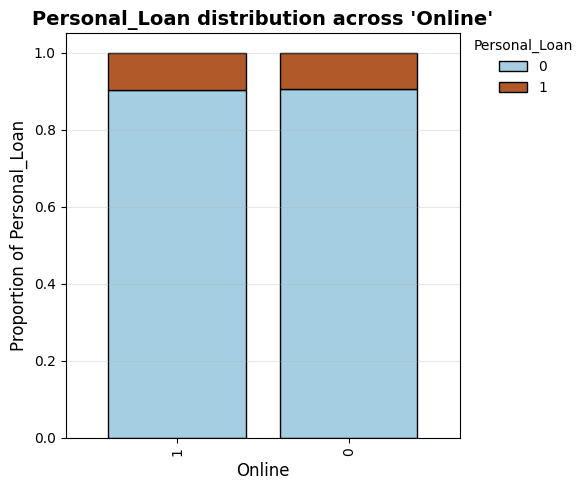

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': "Personal_Loan distribution across 'Online'"}, xlabel='Online', ylabel='Proportion of Personal_Loan'>)

In [468]:
# Online vs. Personal_Loan
stacked_barplot(data, 'Online', 'Personal_Loan')

* There is no visible difference in online banking usage between customers who accepted the personal loan and those who did not, therefore, Online banking usage is not a useful predictor.

Counts (with row/column totals):
Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


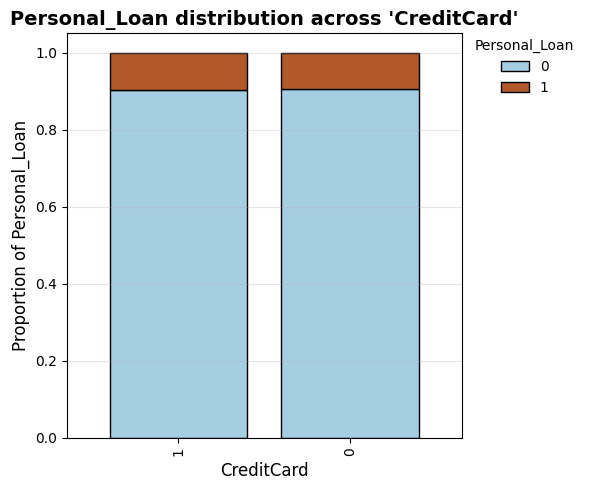

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': "Personal_Loan distribution across 'CreditCard'"}, xlabel='CreditCard', ylabel='Proportion of Personal_Loan'>)

In [469]:
# CreditCard vs. Personal_Loan
stacked_barplot(data, 'CreditCard', 'Personal_Loan')

* There is no meaningful difference in credit card usage between customers who accepted the personal loan and those who did not, therefore, CreditCard is not a useful predictor.

### Summary of Key Predictors for Personal Loan Acceptance

* Based on the bivariate analysis and correlation results, the most influential predictors of personal loan acceptance are `Income`, `Family`, `CCAvg`, `Education`, and `CD_Account`.
> 1. Customers accepted the personal loan tend to have higher annual incomes (`Income`: 0.50).
> 2. Family size indicates little impact on personal loan acceptance (`Family`: 0.06).
> 3. Higher monthly credit card spending show a greater likelihood of accepting the loan (`CCAvg`: 0.37).
> 4. `Education` also plays an important role. Customers with graduate or professional degrees shows higher acceptance rates compared to undergraduates (`Education`: 0.14).
> 5. Customers with `CD_Accounts` are more likely to accept a personal loan (`CD_Accounts`: 0.32).

* Therefore, these five variables (`Income`, `Family`, `CCAvg`, `Education`, and `CD_Account`) provides the most meaningful insights into customer behavior and set of predictors for building an effective loan prediction model.

## Data Preprocessing

* Missing value treatment - Negative experiene error was corrected by using the positive above in the data overview section.
* Feature engineering - Answered below.
* Outlier detection and treatment - Answered below.
* Preparing data for modeling - Answered below.
* Any other preprocessing steps (if needed) - Not required based on my understanding.

### Dropping columns with all unique values

In [470]:
# Print unique values from ID column
print(data['ID'].unique())
len(data.ID.unique())

[   1    2    3 ... 4998 4999 5000]


5000

* The `ID` column is containing unique values.

In [471]:
# Remove ID column from the dataframe
data = data.drop(["ID"], axis=1)

### Feature Engineering

In [472]:
# Check unique values from ZIPCode column
unique_zipcodes = len(data["ZIPCode"].unique())
print(f'There are {unique_zipcodes} unique zipcodes are presents in the dataset.')

# Convert ZIPCode column to string data type
data["ZIPCode"] = data["ZIPCode"].astype(str)
short_unique_zipcodes = len(data["ZIPCode"].str[0:2].unique())
print(f'Based on the first two numbers from the fill zipcode, there are {short_unique_zipcodes} unique zipcodes are presents in the dataset.')

# Replace all the full zipcode using first two digits
data["ZIPCode"] = data["ZIPCode"].str[0:2]

# Convert ZIPCode column as category
data["ZIPCode"] = data["ZIPCode"].astype("category")

There are 467 unique zipcodes are presents in the dataset.
Based on the first two numbers from the fill zipcode, there are 7 unique zipcodes are presents in the dataset.


In [473]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "ZIPCode",
    "Family",
    "Education",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard"
]
data[cat_cols] = data[cat_cols].astype("category")

### Outlier Detection

In [474]:
# Select only numeric columns except the target column (Personal_Loan)
num_data = data.select_dtypes(include=["float64", "int64"]).drop(columns=["Personal_Loan"])

# 25th and 75th percentiles
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)

# Interquartile range
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Percentage of outliers in each numeric column
outlier_pct = ((num_data < lower) | (num_data > upper)).sum() / len(data) * 100
outlier_pct

,0
Age,0.00
Experience,0.00
Income,1.92
CCAvg,6.48
Mortgage,5.82


* Using the 1.5xIQR rule on the numeric predictors, it is clear that there are no outliers in `Age` and `Experience`, and a small number of outliers in `Income` ~2%, `CCAvg` ~6.5%, and `Mortgage` ~5.8%.
* It indicates that there are genuinely high-income, high-spending, or high-mortgage customers rather than data errors, therefore, it is a good idea  to retain them for modeling.
* The target variable Personal_Loan is binary, so IQR-based outlier detection is not meaningful for it and is excluded from this step.

### Preparing data for modeling

In [475]:
# Dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

# One-hot encoding only for categorical variables with >2 levels
X = pd.get_dummies(X, columns=["ZIPCode", "Family", "Education"], drop_first=True)

# Convert to float
X = X.astype(float)

# Split the dataset into training and testing sets.
# - X contains the feature variables
# - Y contains the target variable
# - test_size=0.30 means 30% of the data is reserved for testing and 70% for training
# - random_state=1 ensures the split is reproducible (same shuffle each run)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [476]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 19)
Shape of test set :  (1500, 19)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

* In this business problem, the primary objective of AllLife Bank is to correctly identify customers who are likely to accept a personal loan. Missing such customers results in a lost revenue opportunity for the bank.

* Therefore, Recall is the most important evaluation metric because it measures how many actual loan-takers the model successfully identifies (minimizing false negatives).

* Precision is also reported to ensure efficient targeting and control unnecessary marketing costs, but it is secondary to Recall.

* F1-score is used as a combined measure of both Precision and Recall, especially given the imbalanced nature of the dataset.


In [477]:
# Function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [478]:
# Funtion to plot Confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [479]:
# Function to plot feature importance
def plot_feature_importance(model, feature_names, title="Feature Importance Ranking"):
    """
    Plot sorted feature importances for a tree-based model.

    Parameters
    ----------
    model : sklearn-like model
        A fitted model with the attribute `.feature_importances_`
        (e.g., DecisionTreeClassifier, RandomForestClassifier).

    feature_names : list of str
        Names of the input features in the same order as the model was trained.

    title : str, optional
        Title of the plot (default: "Feature Importance Ranking").
    """

    # Extract feature importances from model
    importances = model.feature_importances_

    # Sort importances (small -> large) and reorder feature names
    indices = np.argsort(importances)
    sorted_features = [feature_names[i] for i in indices]
    sorted_importances = importances[indices]

    # Create figure
    plt.figure(figsize=(10, 8))
    plt.title(title, fontsize=16, fontweight="bold", pad=15)

    # Plot horizontal bar chart
    sns.barplot(
        x=sorted_importances,
        y=sorted_features,
        palette="viridis"
    )

    # Axis labels
    plt.xlabel("Importance Score", fontsize=12)
    plt.ylabel("Feature Name", fontsize=12)

    # Add numeric annotation to each bar
    for i, val in enumerate(sorted_importances):
        plt.text(
            val + 0.005,   # offset to avoid overlapping the bar
            i,
            f"{val:.3f}",
            fontsize=10,
            va="center"
        )

    # Add grid for better readability
    plt.grid(axis="x", linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.show()


In [480]:
# Function to plot a decision tree
def plot_decision_tree(model, feature_names=None, figsize=(20, 30), fontsize=9):
    """
    Plot a fully expanded visualization of a trained DecisionTreeClassifier.

    Parameters
    ----------
    model : DecisionTreeClassifier
        A fitted decision tree model.
    feature_names : list, optional
        Names of the input features. If None, generic names are used.
    figsize : tuple, optional
        Figure size for the plot.
    fontsize : int, optional
        Font size for node text annotations.
    """

    # Create a large figure so deep trees remain readable
    plt.figure(figsize=figsize)

    # Draw the tree using sklearn's plot_tree
    out = sktree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=fontsize,
        node_ids=False,
        class_names=None
    )

    # Fix missing arrowheads (sklearn sometimes omits them)
    for obj in out:
        arrow = obj.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)

    plt.show()

### Model Building

#### Decision Tree

In [481]:
# Initialize a Decision Tree classifier
# - criterion="gini" - measures impurity to decide best splits
# - random_state=1 - fixes randomness so results are reproducible
decision_tree_1 = DecisionTreeClassifier(criterion="gini", random_state=1)

# Fit model using the training set
decision_tree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

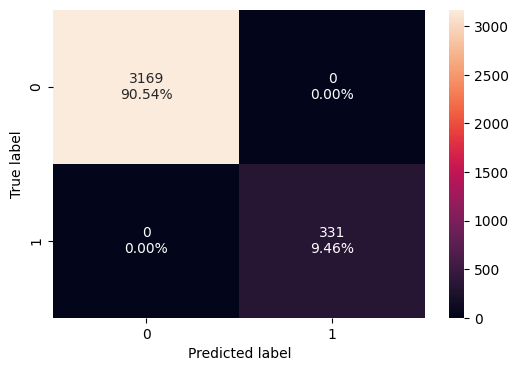

In [482]:
# Plot confusion matrix of the training set
confusion_matrix_sklearn(decision_tree_1, X_train, y_train)

In [483]:
# Calculate the model performance on training set
decision_tree_1_perf_train = model_performance_classification_sklearn(decision_tree_1, X_train, y_train)
decision_tree_1_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Confusion matrix and performance indicates that model has fit to the data very well, and did a really good on prediting true positive and true negative with 100% accuracy, 100% recall, 100% precision and F1 score.

#### Visualizing the Decision Tree

In [484]:
# List all the features from the training set
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3']


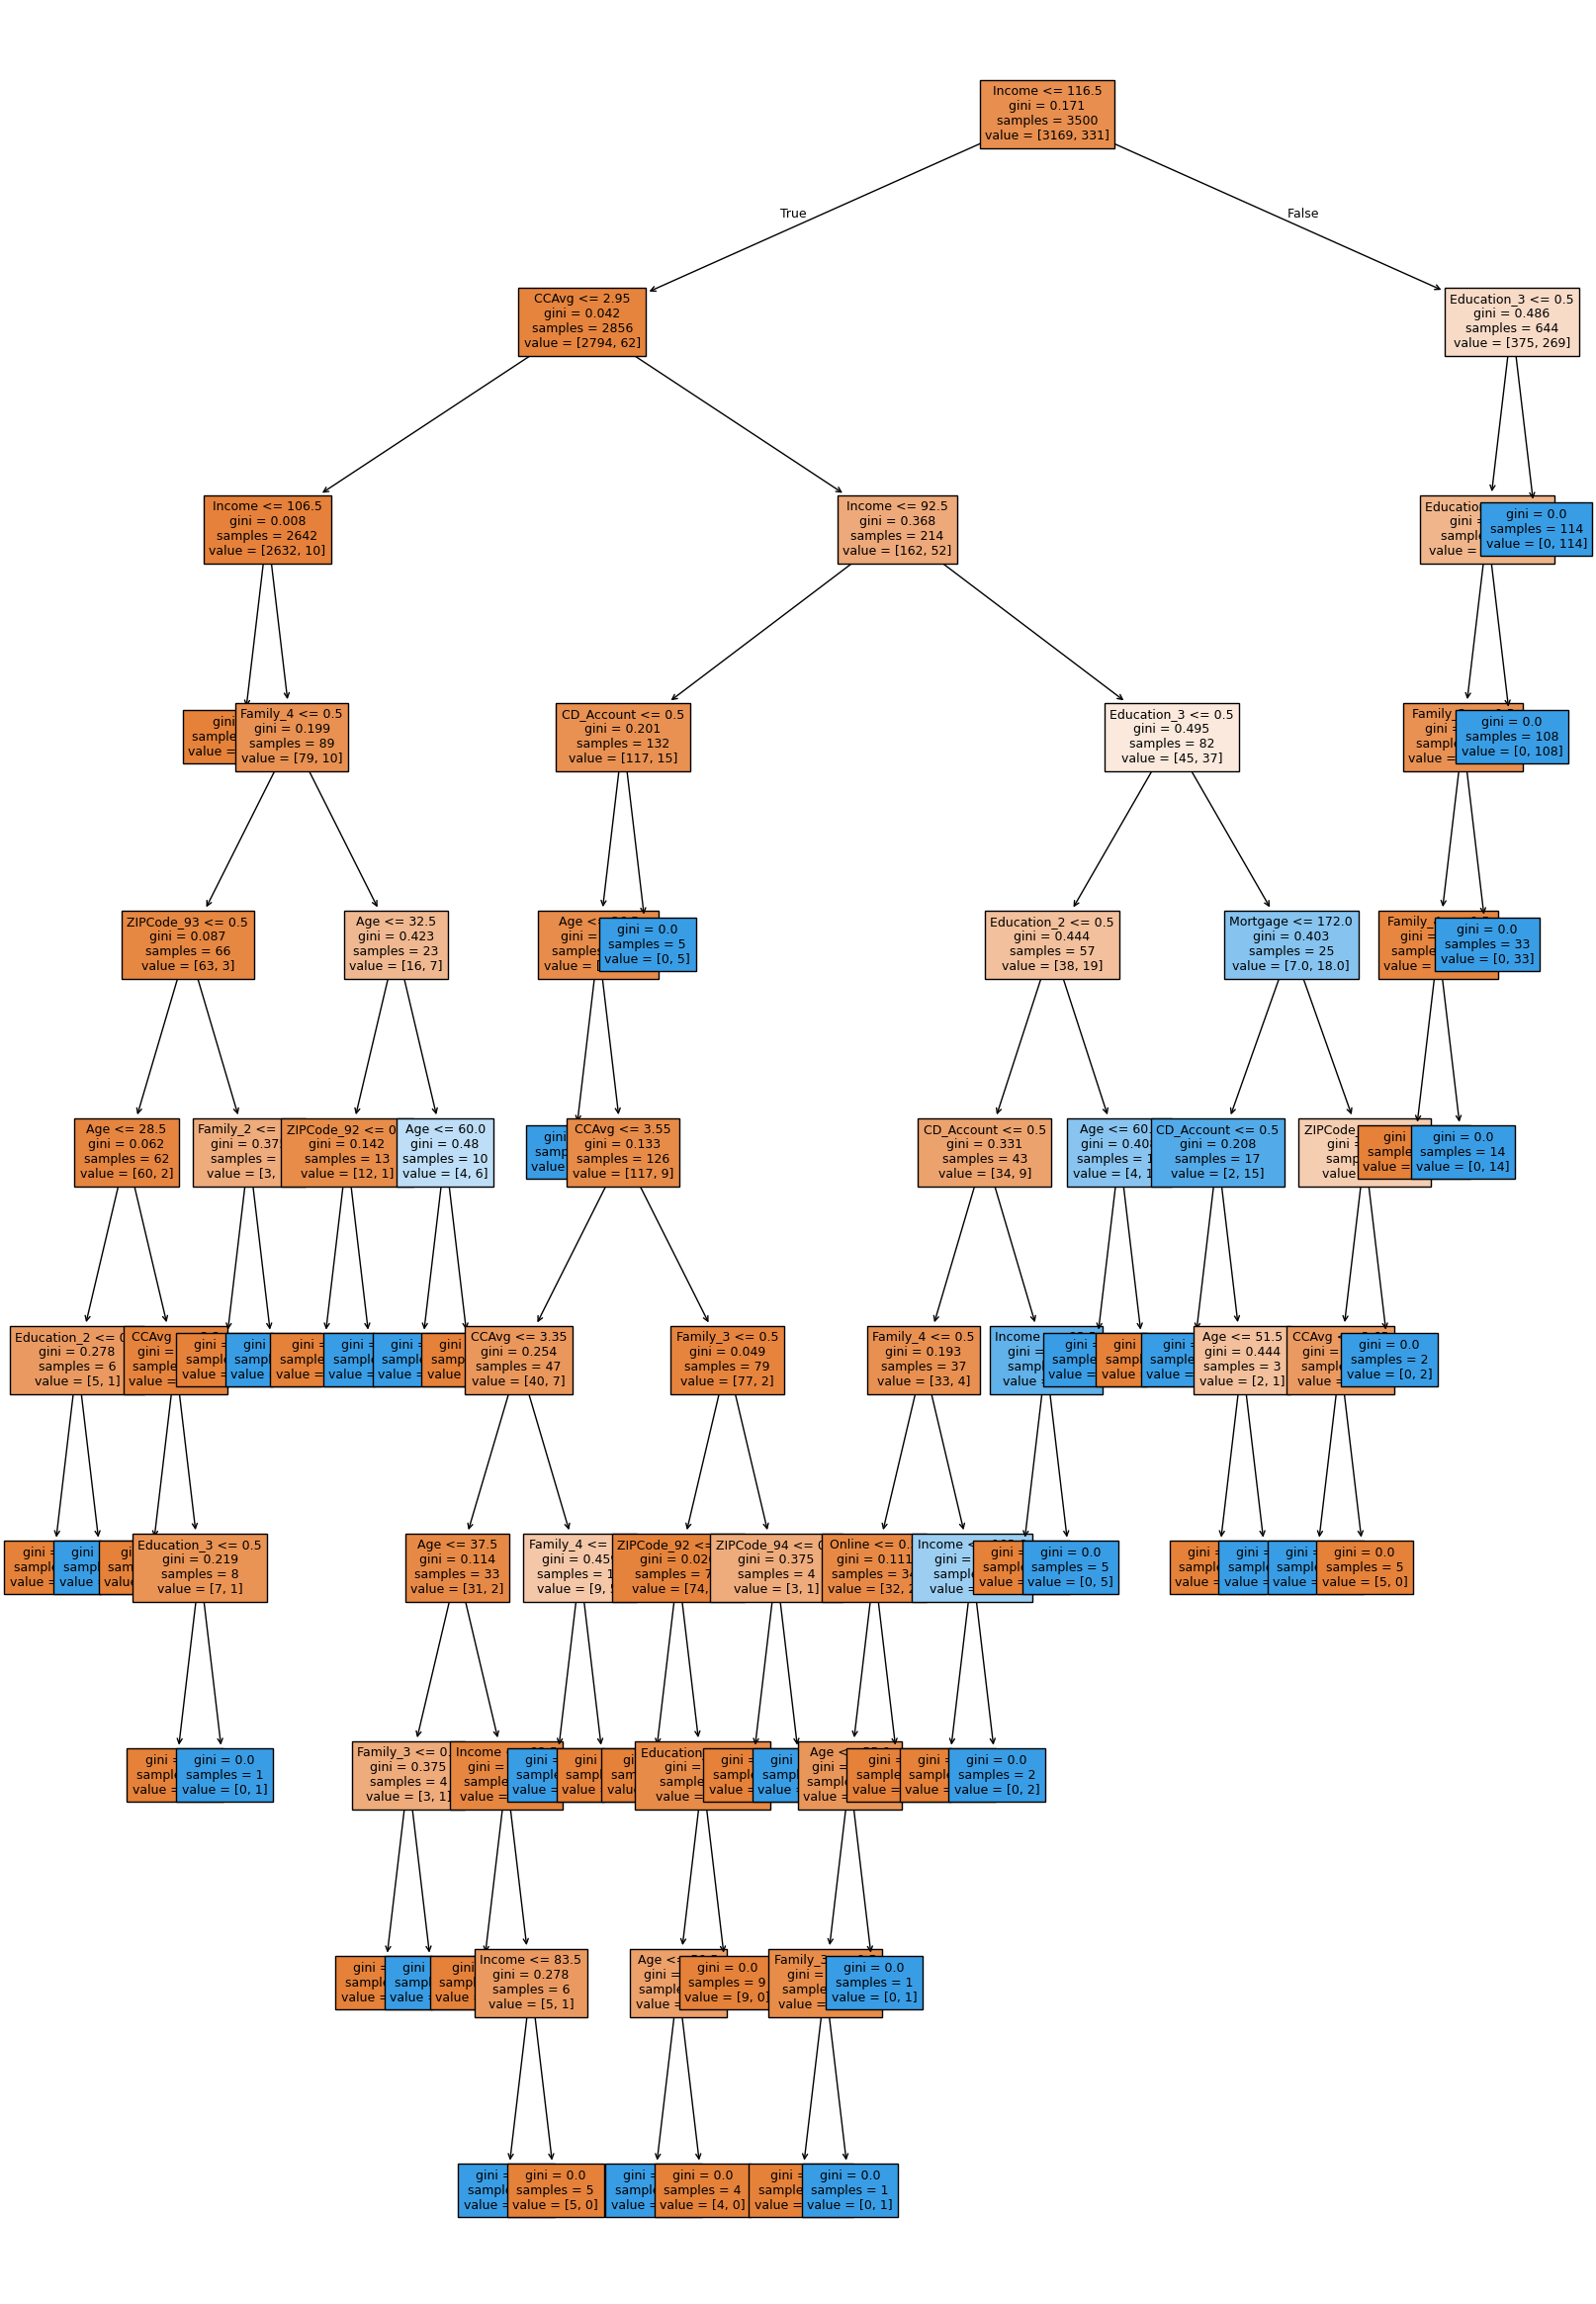

In [485]:
# Plot a fully expanded visualization of the decision tree
plot_decision_tree(decision_tree_1, feature_names=feature_names)

In [486]:
# Text report showing the rules of a decision tree
print(tree.export_text(decision_tree_1, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Family_2 <

In [487]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(pd.DataFrame(decision_tree_1.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.306043
Education_2         0.238344
Education_3         0.168738
Family_3            0.100618
Family_4            0.062971
CCAvg               0.045321
Age                 0.034035
CD_Account          0.026348
ZIPCode_94          0.005978
Mortgage            0.004672
ZIPCode_92          0.003274
Family_2            0.002503
ZIPCode_93          0.000594
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


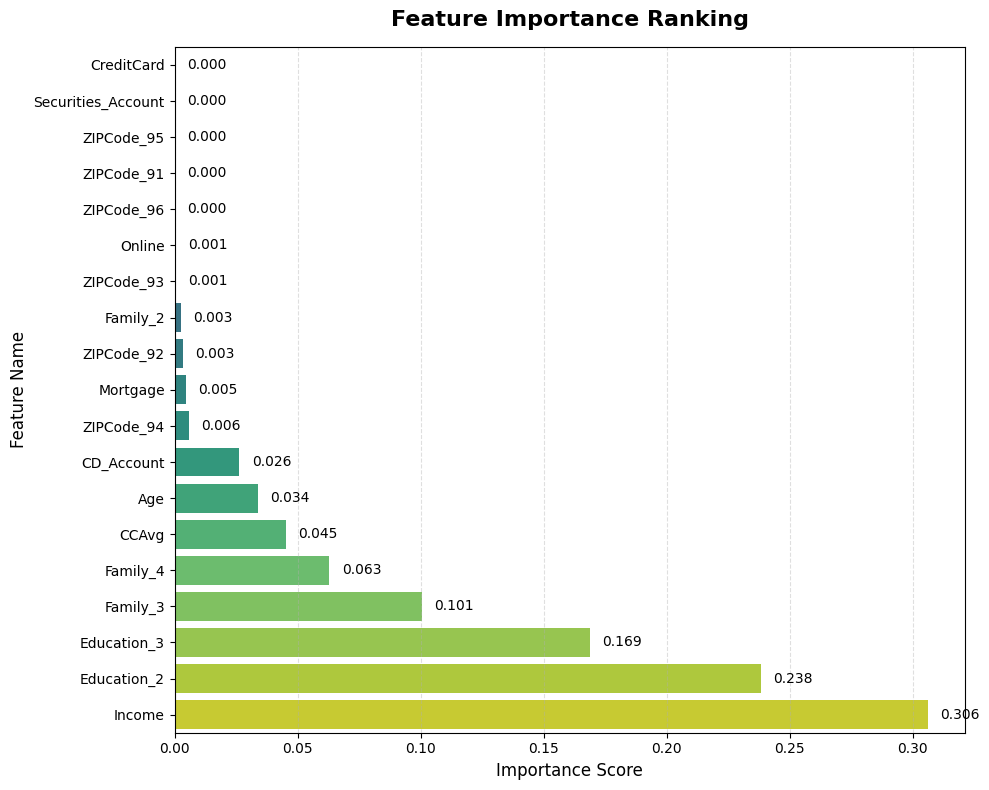

In [488]:
# Plot feature importance
plot_feature_importance(decision_tree_1, feature_names)

* Feature importances plot indicates that income, higher education and professionals, family of 3 and 4, higher average credit card spending, age, and certificate deposite account customers are most important variables to correctly identify customers who are likely to accept a personal loan.
* This matches with EDA except the age feature.

#### Checking model performance on test data

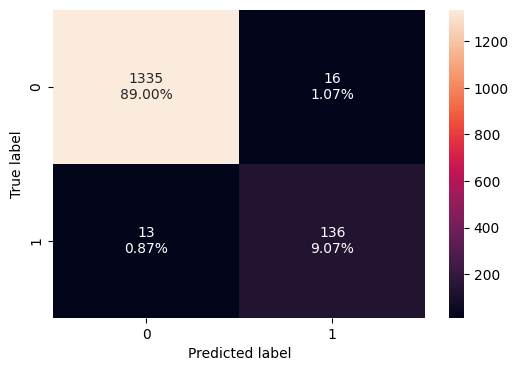

In [489]:
# Plot confusion matrix on test set
confusion_matrix_sklearn(decision_tree_1, X_test, y_test)

In [490]:
# Calculate model performance on test set
decision_tree_1_perf_test = model_performance_classification_sklearn(decision_tree_1, X_test, y_test)
decision_tree_1_perf_test

,Accuracy,Recall,Precision,F1
0,0.980667,0.912752,0.894737,0.903654


* Confusion matrix and performance indicates that model predicted ~1% and 0.9% false positive and false negative respectively. Performance on test set indicates that recall, precision, and f1-score all dropped significantly on the test set, confirming that the model had overfit on the training set.

## Model Performance Improvement

#### Pre-pruning

In [491]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(3, 10, 1)              # 3, 4, 5, 6, 7, 8, 9
max_leaf_nodes_values = np.arange(20, 140, 20)     # 20, 40, 60, 80, 100, 120
min_samples_split_values = np.arange(20, 120, 30)  # 20, 50, 80, 110


# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (test_recall_score > best_test_score) or (test_recall_score == best_test_score and score_diff < best_score_diff):
              best_score_diff = score_diff
              best_test_score = test_recall_score
              best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")


Best parameters found:
Max depth: 5
Max leaf nodes: 20
Min samples split: 110
Best test recall score: 0.9798657718120806


In [492]:
# Fit the best algorithm to the data.
decision_tree_2 = best_estimator
decision_tree_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(5),
                       max_leaf_nodes=np.int64(20),
                       min_samples_split=np.int64(110), random_state=42)

#### Checking model performance on training data

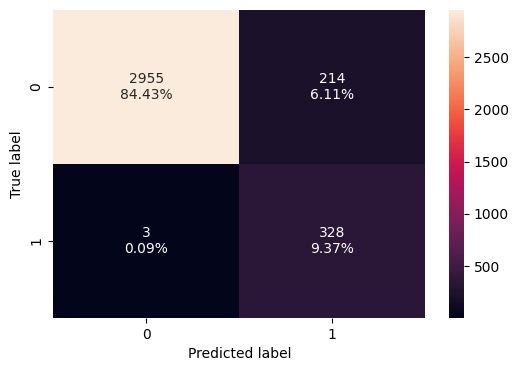

In [493]:
# Plot confusion matrix of the training set
confusion_matrix_sklearn(decision_tree_2, X_train, y_train)

In [494]:
# Calculate the model performance on training set
decision_tree_2_perf_train = model_performance_classification_sklearn(decision_tree_2, X_train, y_train)
decision_tree_2_perf_train

,Accuracy,Recall,Precision,F1
0,0.938,0.990937,0.605166,0.751432


* Confusion matrix indicates that after pre-pruning the tree, model now produces more false positives and small number of false nagatives which is expected. Performance on training set indicates that accuracy drops slightly compared to the overfitted model, recall remains high (~99%), precision drops to ~60%, and f1-score improves general balance.

#### Visualizing the Decision Tree

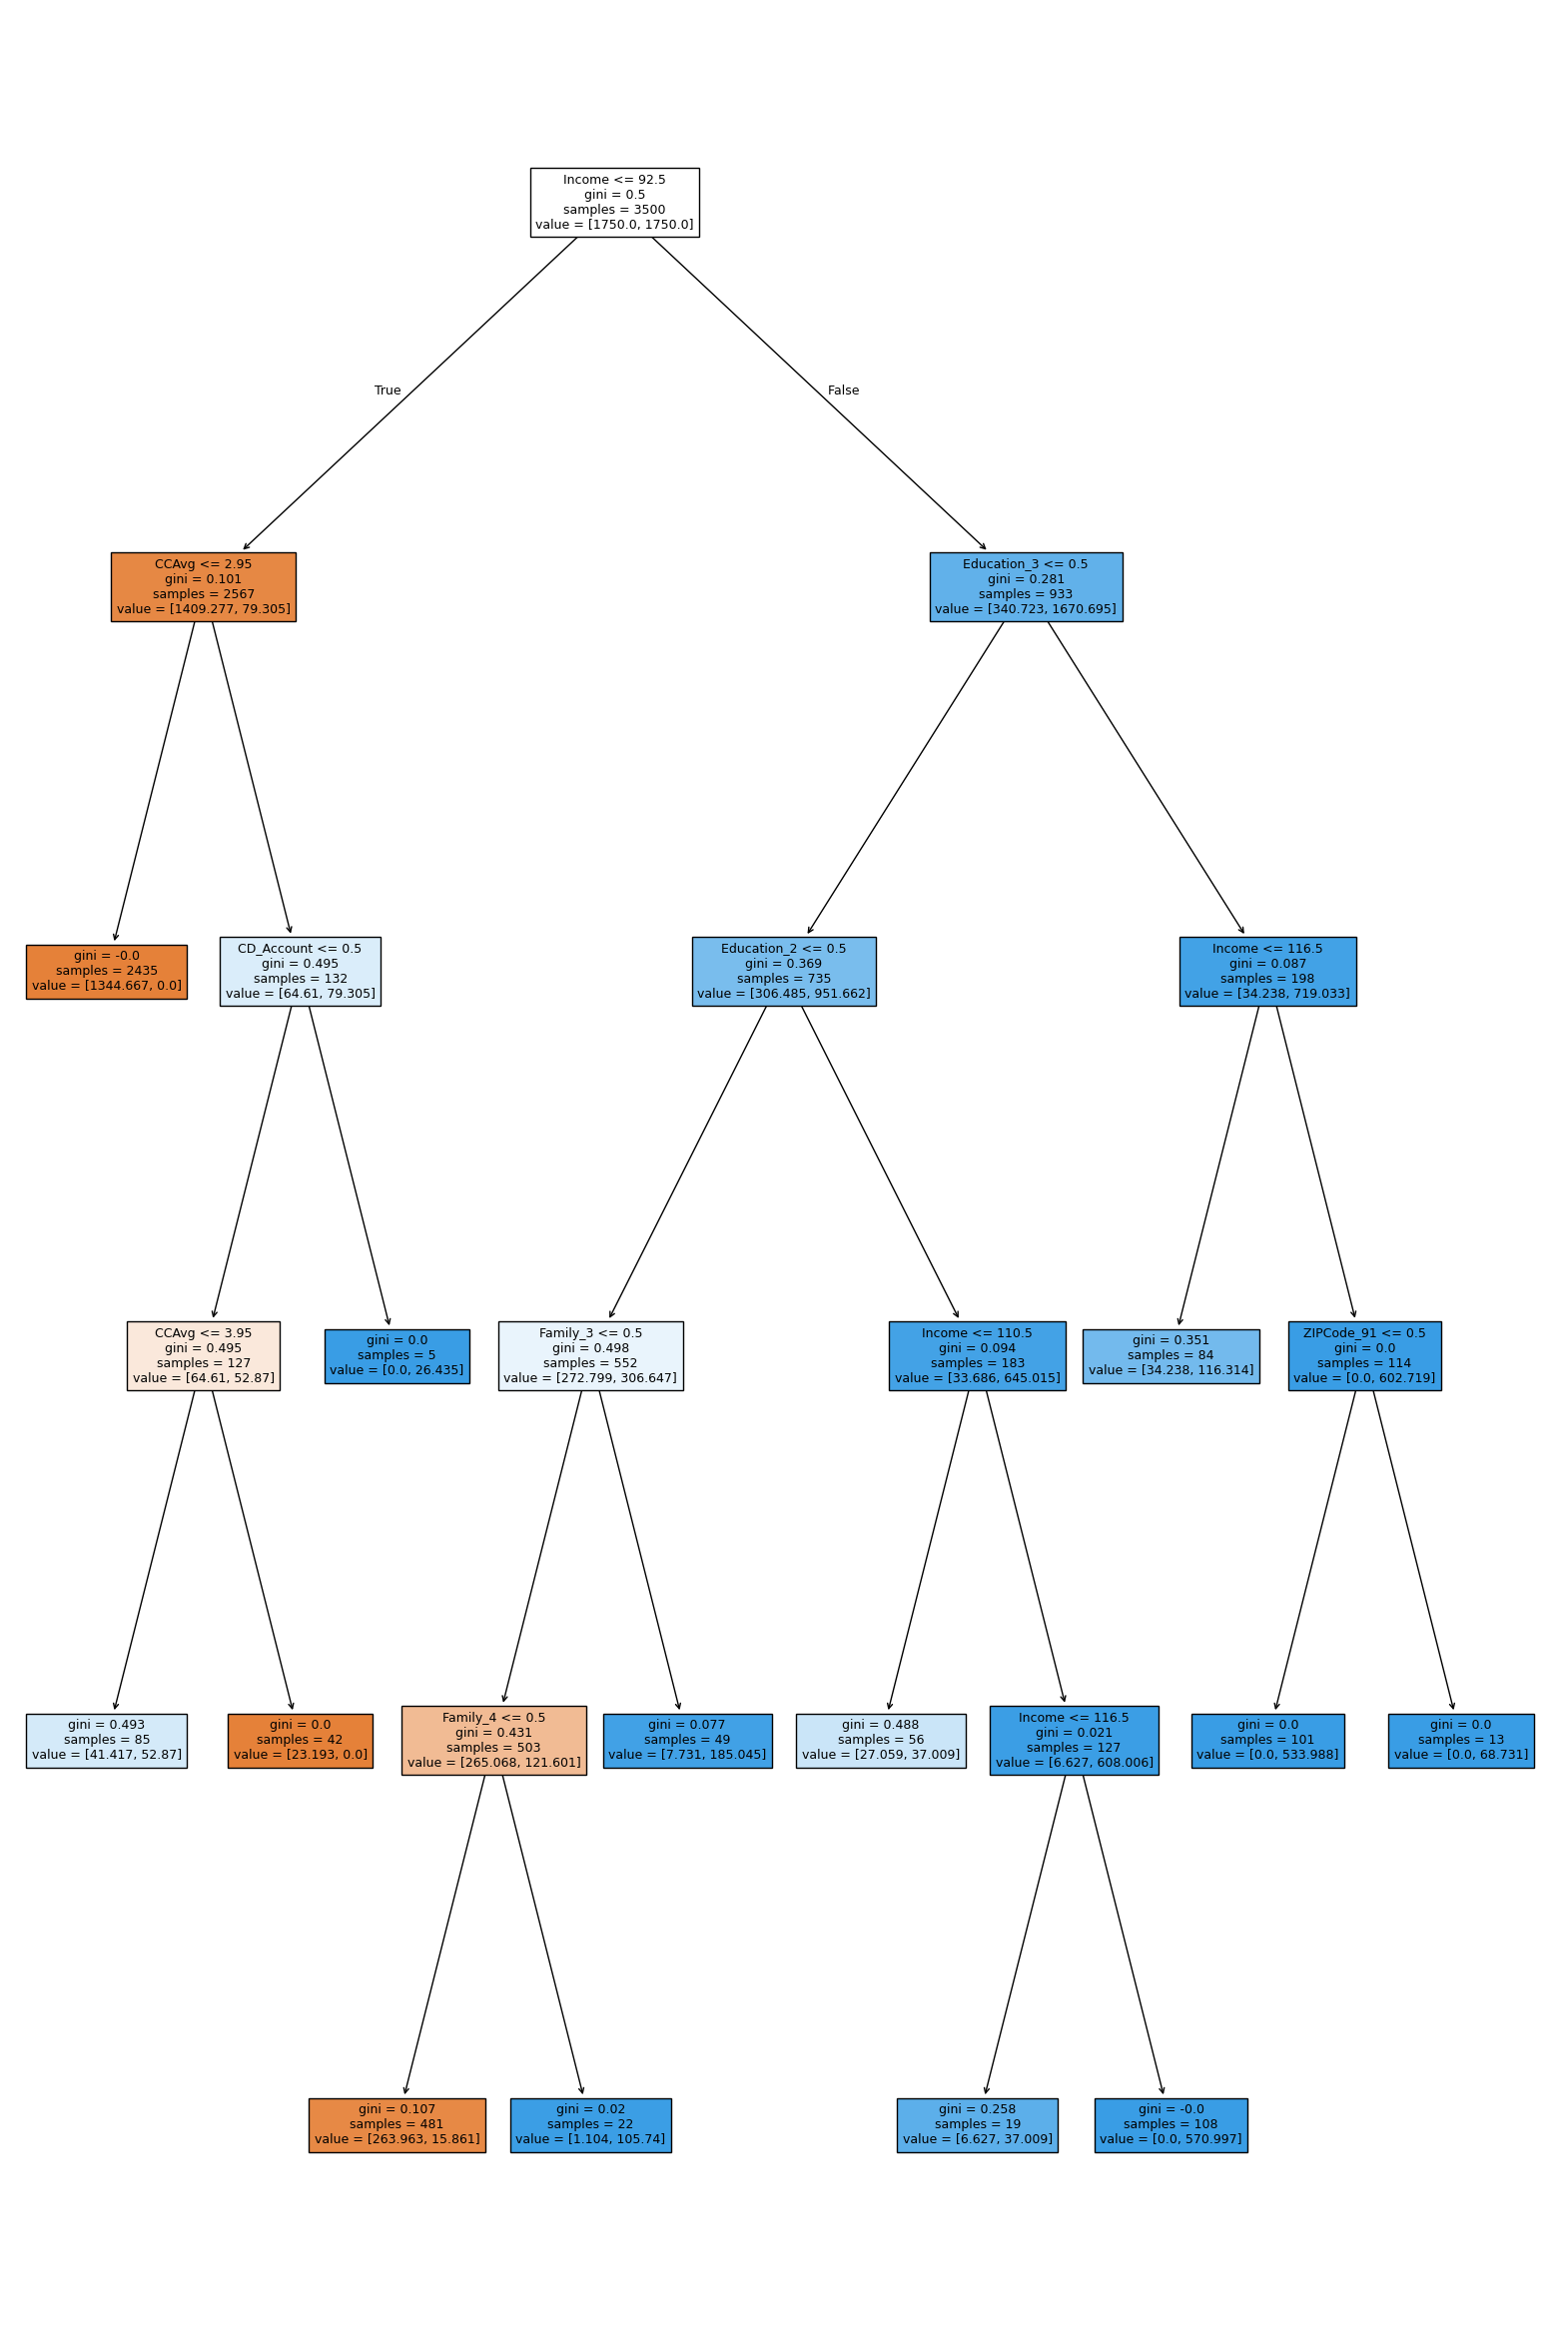

In [495]:
# Plot a fully expanded visualization of the decision tree
plot_decision_tree(decision_tree_2, feature_names=feature_names)

In [496]:
# Text report showing the rules of a decision tree
print(tree.export_text(decision_tree_2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.10, 105.74] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [7.73, 185.05] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- weights: [27.06, 37.01] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- Income <= 116.50
|   |   |   |

In [497]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(pd.DataFrame(decision_tree_2.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                             Imp
Income              6.839719e-01
Family_4            8.622187e-02
Education_2         7.102777e-02
Family_3            6.864797e-02
CCAvg               5.806993e-02
Education_3         2.369911e-02
CD_Account          8.361491e-03
ZIPCode_91          1.157263e-15
Age                 0.000000e+00
Securities_Account  0.000000e+00
Mortgage            0.000000e+00
ZIPCode_93          0.000000e+00
ZIPCode_92          0.000000e+00
CreditCard          0.000000e+00
Online              0.000000e+00
Family_2            0.000000e+00
ZIPCode_96          0.000000e+00
ZIPCode_95          0.000000e+00
ZIPCode_94          0.000000e+00


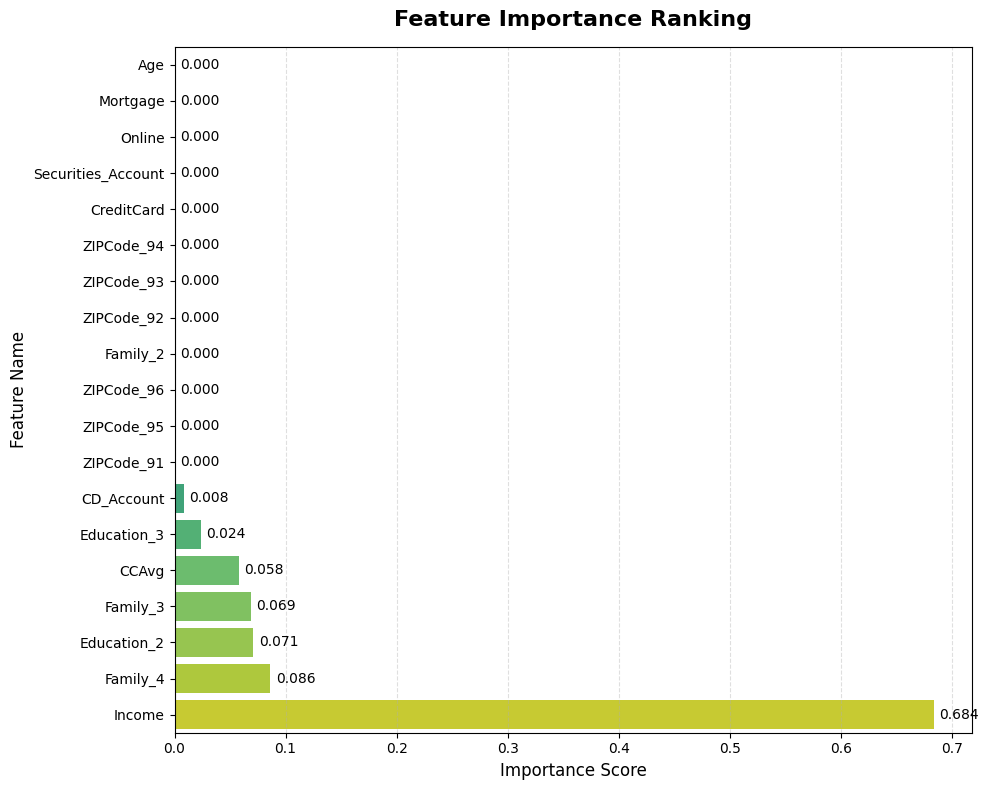

In [498]:
# Plot feature importance
plot_feature_importance(decision_tree_2, feature_names)

* After pre-pruning, feature importances plot matches EDA.  

> 1. Income remains the strong predictor.
> 2. Higher education, professionals, family of 3 and 4 still matter and maintain moderate importance.
> 3. CCAvg (higher average credit card spending), and CD_Accoung (certificate deposite account) remains small but meaningful importance.
> 4. ZIPCode, Mortgage, Online, CreditCard, Securities_Account, Age are weak predictor and pruning correctly eliminates them.

#### Checking model performance on test data

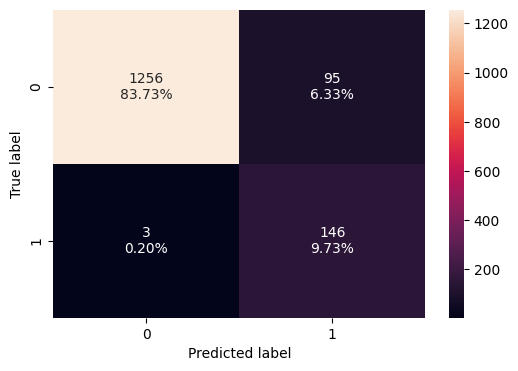

In [499]:
# Plot confusion matrix on test set
confusion_matrix_sklearn(decision_tree_2, X_test, y_test)

In [500]:
# Calculate model performance on test set
decision_tree_2_perf_test = model_performance_classification_sklearn(decision_tree_2, X_test, y_test)
decision_tree_2_perf_test

,Accuracy,Recall,Precision,F1
0,0.934667,0.979866,0.605809,0.748718


* Confusion matrix and performance indicates that model after pre-pruning achieves 93.47% accuracy with an excellent recall of 97.99%, meaning it correctly identifies nearly all potential loan buyers.
* Although precision is moderate at 60.58%, this trade-off is acceptable for the marketing objective, where it is more important to capture as many true loan-interested customers as possible rather than minimize outreach efforts.
* The model misclassifies only 3 actual loan buyers (FN) while identifying 146 correctly (TP), making it highly suitable for targeted marketing campaigns aimed at increasing personal loan conversions.

#### Post-pruning

In [501]:
# Initialize the tree
clf = DecisionTreeClassifier(random_state=1)

# Compute the pruning path during Minimal Cost-Complexity Pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Get ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [502]:
# Prints ccp_alphas and	impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000188,0.000564
2,0.000268,0.001637
3,0.000273,0.003274
4,0.000275,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000476,0.006138
9,0.000476,0.006614


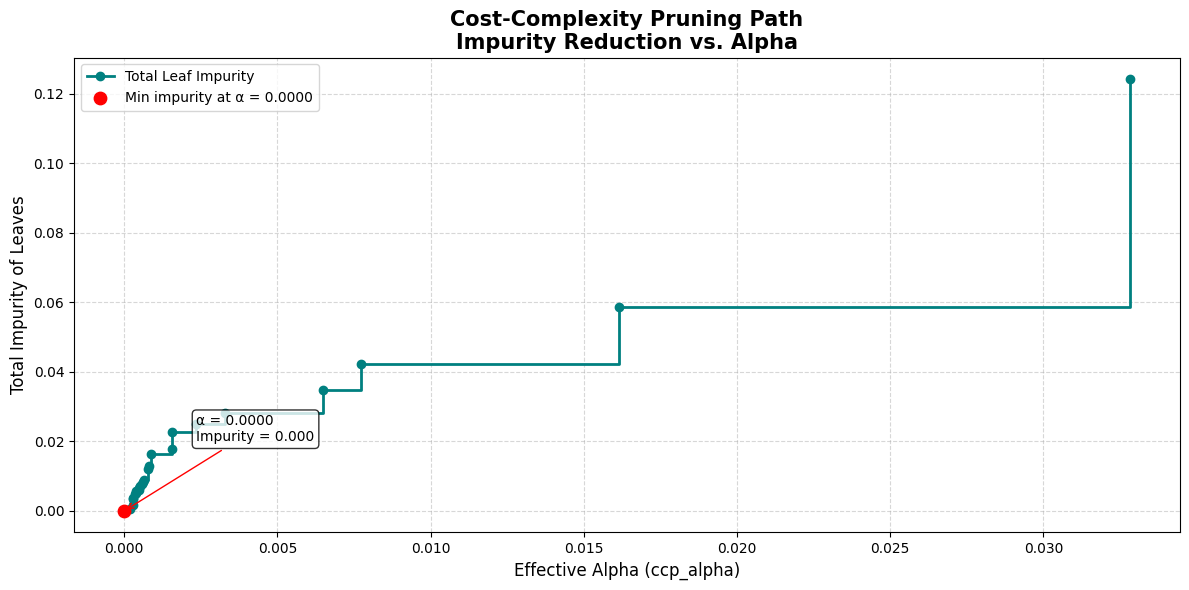

In [503]:
# Plot total Impurity vs effective alpha
fig, ax = plt.subplots(figsize=(12, 6))

# Plot impurity vs. effective alpha
ax.plot(
    ccp_alphas[:-1],                  # exclude the last alpha (always 0 impurity)
    impurities[:-1],
    marker="o",
    markersize=6,
    linewidth=2,
    color="teal",
    drawstyle="steps-post",
    label="Total Leaf Impurity"
)

# Identify best alpha (minimum impurity)
best_idx = np.argmin(impurities[:-1])
best_alpha = ccp_alphas[best_idx]
best_impurity = impurities[best_idx]

# Highlight the best point
ax.scatter(
    best_alpha,
    best_impurity,
    color="red",
    s=80,
    zorder=5,
    label=f"Min impurity at α = {best_alpha:.4f}"
)

# Add annotation for best alpha
ax.annotate(
    f"α = {best_alpha:.4f}\nImpurity = {best_impurity:.3f}",
    xy=(best_alpha, best_impurity),
    xytext=(best_alpha + (max(ccp_alphas) * 0.05), best_impurity + 0.02),
    arrowprops=dict(arrowstyle="->", color="red"),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
)

# Axis labels and title
ax.set_xlabel("Effective Alpha (ccp_alpha)", fontsize=12)
ax.set_ylabel("Total Impurity of Leaves", fontsize=12)
ax.set_title("Cost-Complexity Pruning Path\nImpurity Reduction vs. Alpha", fontsize=15, fontweight="bold")

# Add grid for readability
ax.grid(True, linestyle="--", alpha=0.5)

# Add legend
ax.legend(loc="best")

plt.tight_layout()
plt.show()


In [504]:
# Train a series of decision trees using each effective alpha value from cost-complexity pruning.
# For every ccp_alpha obtained earlier, we:
#   1. Create a new DecisionTreeClassifier with that pruning strength.
#   2. Fit the tree on the training data (X_train, y_train).
#   3. Store the trained model in the list 'clfs' to analyze later (e.g., depth, nodes, accuracy).
# The final print statement shows the number of nodes in the MOST-pruned tree
# (the one with the largest ccp_alpha), which is usually the simplest model.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596768


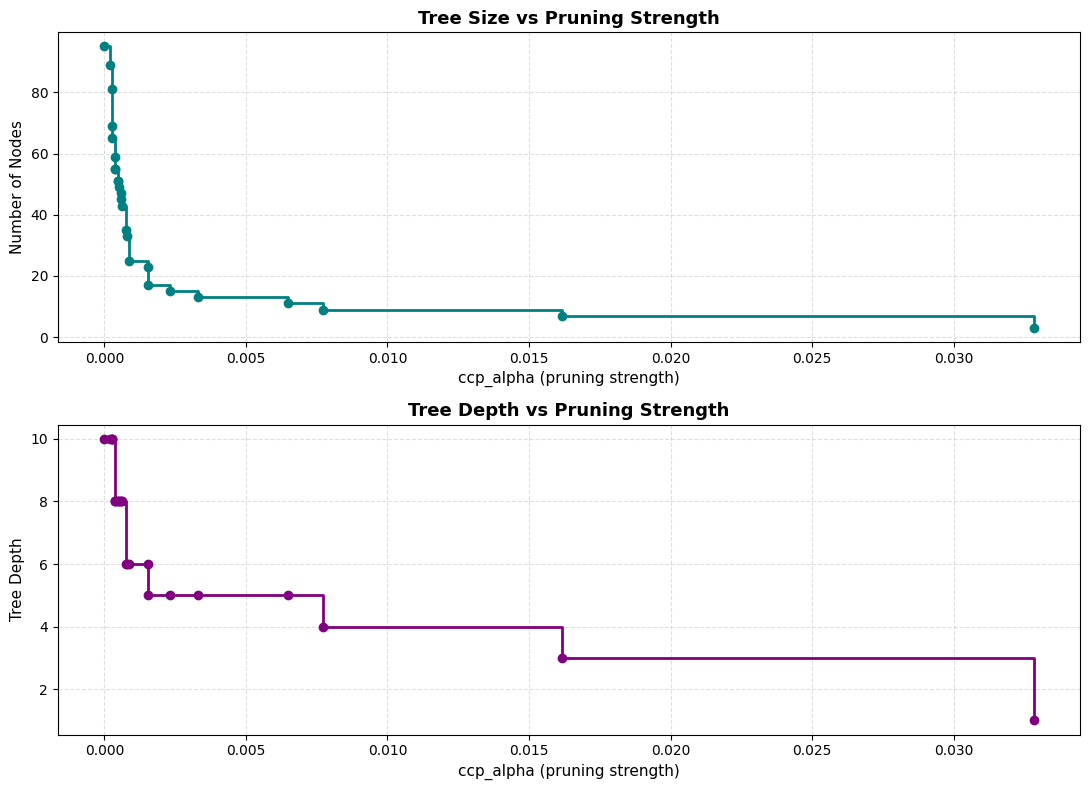

In [505]:
# The last classifier corresponds to the largest ccp_alpha value.
# For most datasets, this produces a tree with only a root node (no splits).
# Since such a collapsed tree is not useful for evaluation or visualization,
# we remove it from consideration.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract complexity metrics from each pruned tree.
# - node_count: total number of nodes (lower = simpler tree)
# - max_depth : longest path from root to leaf (another measure of complexity)
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

# Plot the effect of pruning strength (alpha) on tree complexity.
fig, ax = plt.subplots(2, 1, figsize=(11, 8))

# --- 1. Node count vs alpha ---------------------------------------------------
ax[0].plot(
    ccp_alphas,
    node_counts,
    marker="o",
    linewidth=2,
    drawstyle="steps-post",
    color="teal"
)
ax[0].set_xlabel("ccp_alpha (pruning strength)", fontsize=11)
ax[0].set_ylabel("Number of Nodes", fontsize=11)
ax[0].set_title("Tree Size vs Pruning Strength", fontsize=13, fontweight="bold")
ax[0].grid(alpha=0.4, linestyle="--")

# --- 2. Tree depth vs alpha ---------------------------------------------------
ax[1].plot(
    ccp_alphas,
    depths,
    marker="o",
    linewidth=2,
    drawstyle="steps-post",
    color="purple"
)
ax[1].set_xlabel("ccp_alpha (pruning strength)", fontsize=11)
ax[1].set_ylabel("Tree Depth", fontsize=11)
ax[1].set_title("Tree Depth vs Pruning Strength", fontsize=13, fontweight="bold")
ax[1].grid(alpha=0.4, linestyle="--")

fig.tight_layout()
plt.show()

#### Recall vs alpha for training and testing sets

In [506]:
# Compute recall scores on the training set for each pruned tree.
# This helps us see how pruning affects the model’s ability to correctly identify
# the positive class during training.
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

# Compute recall on the test set for each pruned tree.
# Comparing these scores with training recall helps identify overfitting,
# and helps select the alpha that gives the best generalization performance.
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

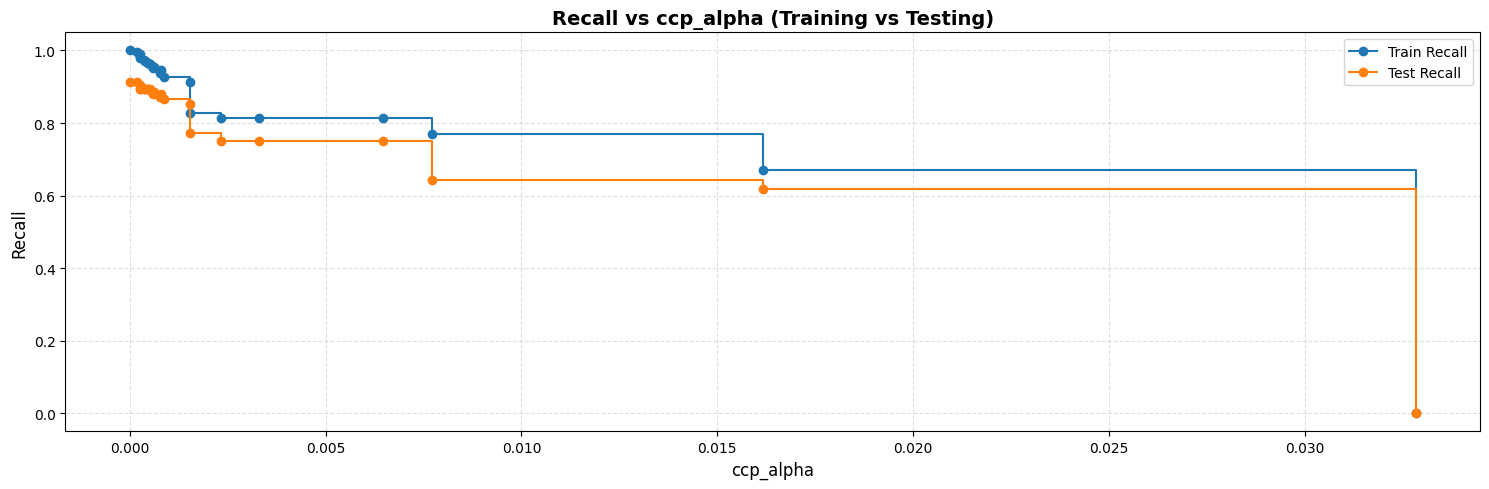

In [507]:
# Plot recall for both training and test sets against increasing alpha values.
# As alpha increases, pruning becomes stronger and the tree becomes simpler.
# This visualization helps identify an alpha value where test recall is high
# and the gap between training and test recall remains small.

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_xlabel("ccp_alpha", fontsize=12)
ax.set_ylabel("Recall", fontsize=12)
ax.set_title("Recall vs ccp_alpha (Training vs Testing)", fontsize=14, fontweight="bold")

# "steps-post" shows how recall changes after each pruning step.
ax.plot(ccp_alphas, recall_train, marker="o", label="Train Recall", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test,  marker="o", label="Test Recall",  drawstyle="steps-post")

ax.grid(True, linestyle="--", alpha=0.4)  # minor addition for readability
ax.legend()

plt.tight_layout()
plt.show()

In [508]:
# choose alpha where test recall is max but train-test gap is minimized
# Convert lists to numpy arrays so subtraction works
recall_train = np.array(recall_train)
recall_test = np.array(recall_test)

# Compute train-test gap
gaps = np.abs(recall_train - recall_test)

# Weighted selection rule:
# maximize test recall but minimize gap between train and test
best_idx = np.argmax(recall_test - gaps * 0.01)

best_alpha = ccp_alphas[best_idx]
best_alpha

np.float64(0.0001879365079365076)

* Based on the recall-vs-alpha curve, ccp_alpha ~ 0.001 gives the best balance because test recall is still high (~0.87 - 0.88) and train recall is not excessively higher.

In [509]:
# Identify the best model based on the highest test recall.
# np.argmax() returns the index of the model with the maximum recall score.
index_best_model = np.argmax(recall_test)

# Retrieve that model from the list of pruned decision trees.
best_model = clfs[index_best_model]

# Display the model configuration (its hyperparameters).
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)


In [510]:
# ----------------------------------------------------------------------
# Train a new Decision Tree model using a chosen pruning strength (ccp_alpha)
# and custom class weights:
#   - Higher weight for class 1 (0.85) to emphasize minority-class performance.
#   - Lower weight for class 0 (0.15) to reduce bias toward the majority class.
# This helps improve recall for the positive class.
# ----------------------------------------------------------------------
estimator = DecisionTreeClassifier(
    ccp_alpha=0.001,               # pruning regularization strength
    class_weight={0: 0.15, 1: 0.85},  # handle class imbalance
    random_state=1                 # ensures reproducible results
)

# Fit the model on the training data
estimator.fit(X_train, y_train)

# Save it as decision_tree_3 for later evaluation or plotting
decision_tree_3 = estimator

#### Checking model performance on training data

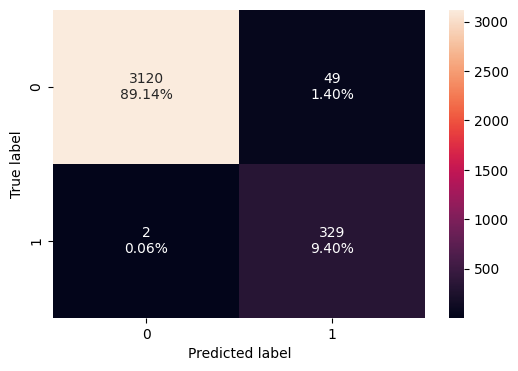

In [511]:
# Plot confusion matrix of the training set
confusion_matrix_sklearn(decision_tree_3, X_train, y_train)

In [512]:
# Calculate the model performance on training set
decision_tree_3_perf_train = model_performance_classification_sklearn(decision_tree_3, X_train, y_train)
decision_tree_3_perf_train

,Accuracy,Recall,Precision,F1
0,0.985429,0.993958,0.87037,0.928068


* The post-pruned decision tree is significantly better than
> 1. Unpruned tree, which overfit
> 2. Pre-pruned tree, which achieved lower recall and precision

#### Visualizing the Decision Tree

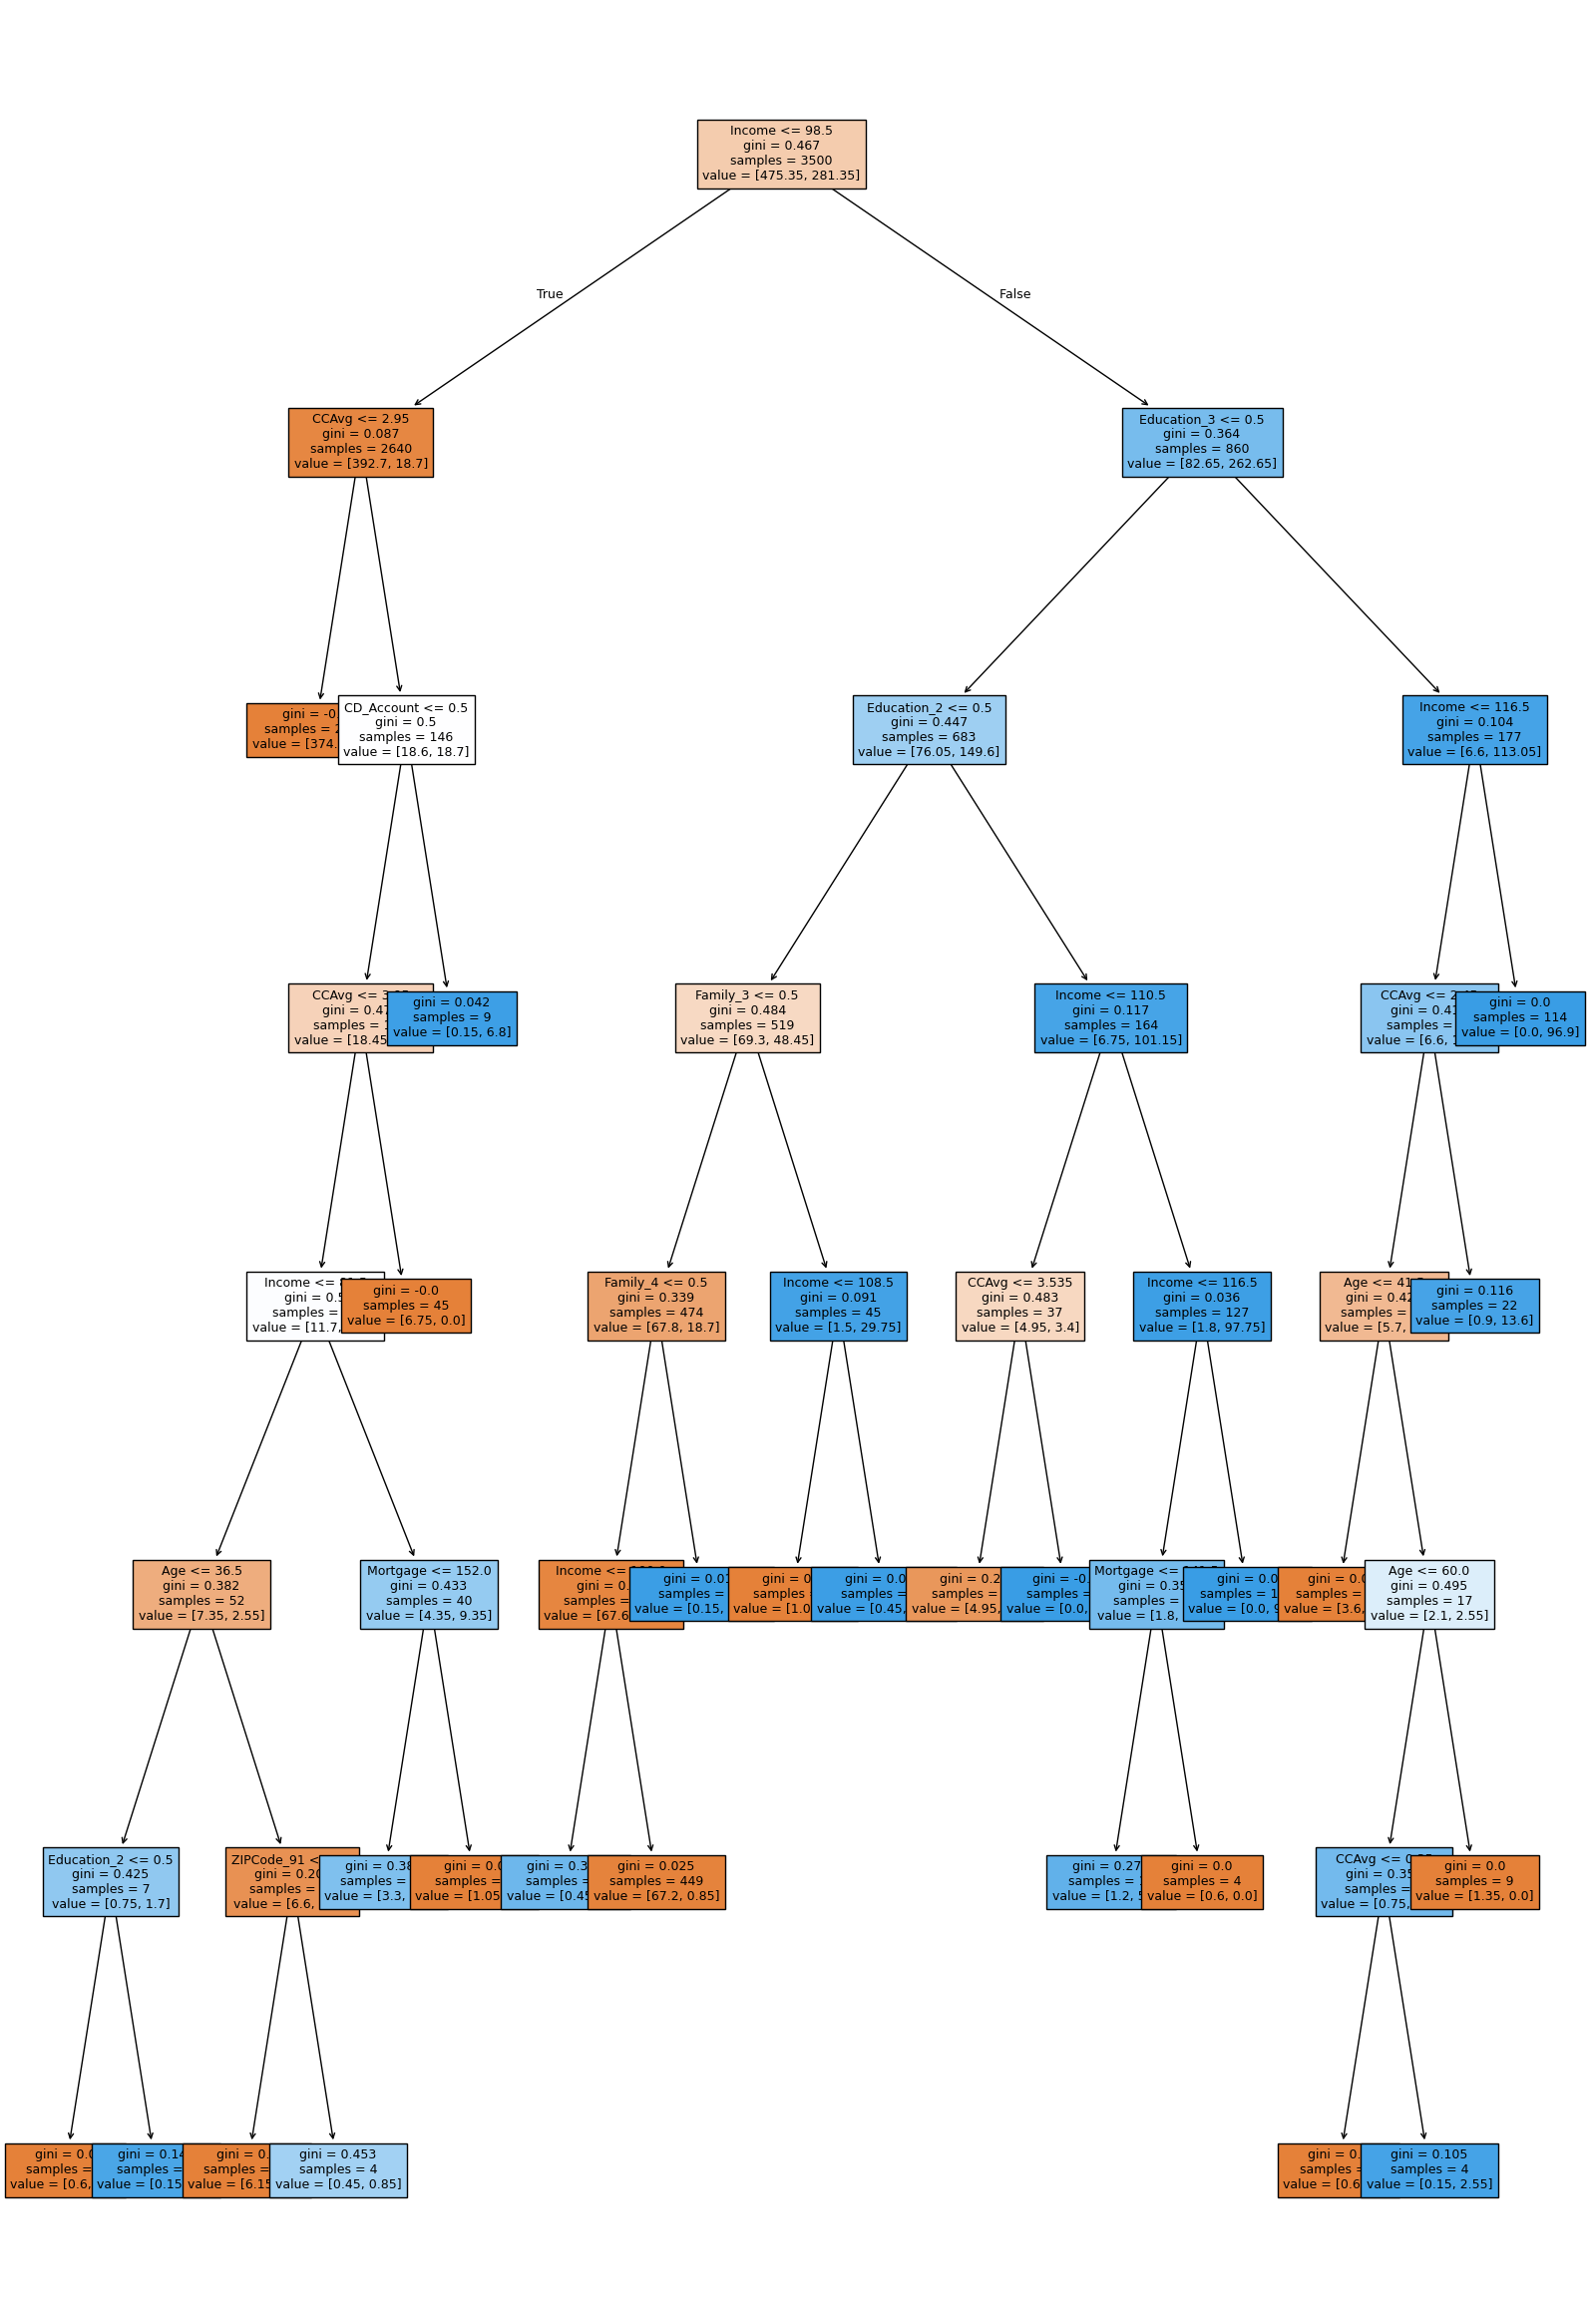

In [513]:
# Plot a fully expanded visualization of the decision tree
plot_decision_tree(decision_tree_3, feature_names=feature_names)

In [514]:
# Text report showing the rules of a decision tree
print(tree.export_text(decision_tree_3, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.45, 0.85] class: 1
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <= 152.00
|   |   |   |   |   |   |--- weights: [3.30, 9.35] class: 1
|   |   |   |   |   |--- Mortgage >  152.00
|   |   |   |   |   |   |--- weights: [1.05, 0.00] class: 0
|   |   |   |---

In [515]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(pd.DataFrame(decision_tree_3.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.613316
Education_2         0.094309
CCAvg               0.080761
Family_3            0.073447
Family_4            0.071215
Education_3         0.036709
CD_Account          0.011488
Age                 0.010649
Mortgage            0.005395
ZIPCode_91          0.002711
Securities_Account  0.000000
ZIPCode_93          0.000000
ZIPCode_92          0.000000
CreditCard          0.000000
Online              0.000000
Family_2            0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000


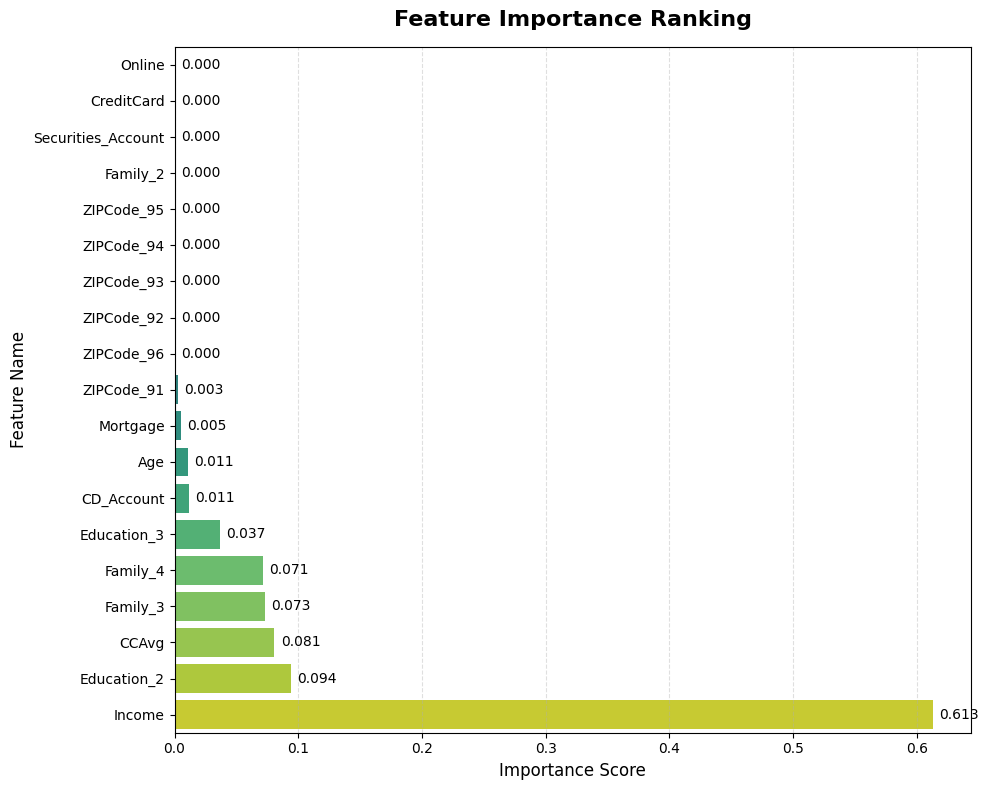

In [516]:
# Plot feature importance
plot_feature_importance(decision_tree_3, feature_names)

* After applying post-pruning to simplify the decision tree, feature importances plot created using the training set indicates that

1. Income remains the strong predictor.
2. Higher education, professionals, family of 3 and 4 still maintains importance.
3. CCAvg (higher average credit card spending) also maintains importance.
4. CD_Accoung (certificate deposite account) remains small but meaningful importance.
4. Age, ZIPCode, Mortgage, Family of 2 members, Online, CreditCard, Securities_Account, are weak predictor.

#### Checking model performance on test data

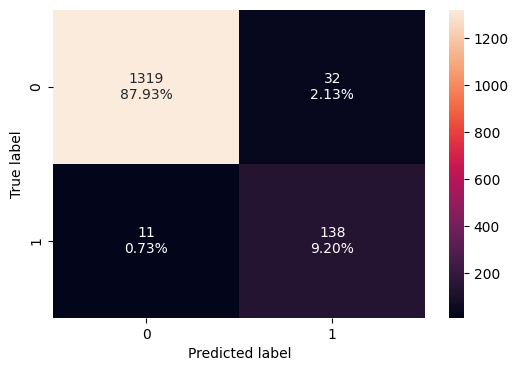

In [517]:
# Plot confusion matrix on test set
confusion_matrix_sklearn(decision_tree_3, X_test, y_test)

In [518]:
# Calculate model performance on test set
decision_tree_3_perf_test = model_performance_classification_sklearn(decision_tree_3, X_test, y_test)
decision_tree_3_perf_test

,Accuracy,Recall,Precision,F1
0,0.971333,0.926174,0.811765,0.865204


* Confusion matrix and performance indicates that after applying post-pruning using cost-complexity pruning to reduce overfitting, the decision tree achieved strong and balanced performance on the test dataset.
* The model reached an accuracy of 97.1%, correctly predicting the majority of customers. The recall for the positive class (loan buyers) is 92.6%, indicating that the pruned model successfully identifies most customers who are likely to purchase a loan which is an objective for targeted marketing.
* The precision of 81.2% reflects that when the model predicts a customer will buy a loan, it is correct most of the time, helping the bank avoid unnecessary promotional costs.
* The F1-score of 0.865 shows a balance between recall and precision. Overall, post-pruning provides a more generalizable and robust model.

## Model Performance Comparison and Final Model Selection

In [519]:
# Training performance comparison
models_train_comp_df = pd.concat([decision_tree_1_perf_train.T, decision_tree_2_perf_train.T, decision_tree_3_perf_train.T], axis=1)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.938000,0.985429
Recall,1.0,0.990937,0.993958
Precision,1.0,0.605166,0.870370
F1,1.0,0.751432,0.928068


In [520]:
# Testing performance comparison
models_test_comp_df = pd.concat([decision_tree_1_perf_test.T, decision_tree_2_perf_test.T, decision_tree_3_perf_test.T], axis=1)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980667,0.934667,0.971333
Recall,0.912752,0.979866,0.926174
Precision,0.894737,0.605809,0.811765
F1,0.903654,0.748718,0.865204


* The three decision tree models (default, pre-pruned, and post-pruned), shows different behaviors in terms of generalization and predictive balance.

* On the training set, the default decision tree achieves perfect scores across all metrics which indicates overfitting. On the other side, both the pre-pruned and post-pruned models shows slightly lower but still very strong performance, demonstrating better model.

* On the test set, the differences become more evident. The default tree maintains high performance (accuracy 98.1%, recall 91.3%), but its perfect training performance suggests it is fitting noise rather than general patterns. The pre-pruned model, while achieving the highest recall (97.99%), suffers from very low precision (60.6%), meaning it incorrectly identifies many non-buyers as potential loan buyers. The post-pruned model offers the most balanced performance, with strong recall (92.6%), much higher precision (81.2%), and an excellent F1 score (0.865). It significantly improves generalization compared to the default model and avoids the over-prediction problem seen in the pre-pruned model.

* Overall, post-pruning provides the best trade-off between identifying true loan buyers and minimizing false positives which makes it the most reliable model for targeted marketing campaigns.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

Based on the results of the decision tree modeling and the feature importance analysis, the following recommendations can help AllLife Bank optimize its personal loan marketing strategy:

1. **Prioritize High-Income Customers** because income is the strongest predictor across all models.
> **Recommendation:**
> Target marketing campaigns toward customers with higher annual income, particularly those earning above the median (~$60K).

2. **Focus on Customers with High Credit Card Spending (CCAvg)** because higher monthly credit card spending strongly correlates with personal loan purchase.
> **Recommendation:**
> Promote loan offers to customers with CCAvg > 2–2.5.

3. **Target Customers with Higher Education Levels** because education level (especially graduate and advanced degrees) was an important predictor in both pruned and unpruned models.
> **Recommendation:** Run more personalized campaigns for customers with Education_2 (Graduate) and Education_3 (Advanced), as these groups have demonstrated higher loan conversion likelihood.

4. **Prioritize Larger Families (Family = 3 or 4)** because family size also showed moderate predictive power.
> **Recommendation:** Create loan products tailored for customers with larger families who may need funds for home improvement, education, or major expenses.

5. **Use CD Account Holders as a Secondary Target Segment** because although CD Account ownership is not as strong a predictor as income or spending but it still contributes meaningful predictive value.
> **Recommendation:** Cross-sell personal loans to customers with CD accounts, especially those nearing CD maturity dates (when they have more liquidity and financial planning activities).

6. **Avoid Over-Targeting Based on ZIPCode Alone** because ZIPCode contributes minimally to the model.
> **Recommendation:** Do not base marketing on ZIPCode.

7. **Use Post-Pruned Model for Campaign Targeting** because the post-pruned model offers hHigh recall (captures most likely buyers), strong precision (minimizes wasted marketing costs), and excellent f1-score balance.
> **Recommendation:** Deploy the post-pruned decision tree as the primary model for selecting customers for the next marketing campaign.

8. **Reduce Marketing Costs by Avoiding Over-Targeting** because the pre-pruned model predicted too many false positives, meaning many uninterested customers would have been targeted.
> **Recommendation:** Either use post-pruned decision tree as the primary model or use the more balanced post-pruned model.

9. **Develop Tailored Loan Products for High-Profit Segments** (high-income and high-spending customers)

10. **Include Additional Features to Improve Model Accuracy**

## Export notebook to .HTML

In [524]:
# To export this notebook as .html for the submission
!jupyter nbconvert --to html '/content/drive/MyDrive/ColabNotebooks/PersonalLoanCampaign/AIML_ML_Project_Full_Code_Notebook.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/PersonalLoanCampaign/AIML_ML_Project_Full_Code_Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 40 image(s).
[NbConvertApp] Writing 4223790 bytes to /content/drive/MyDrive/ColabNotebooks/PersonalLoanCampaign/AIML_ML_Project_Full_Code_Notebook.html


___